# Módulo 2 - Agentes Inteligentes

![alt text](https://i.pinimg.com/564x/ed/1b/64/ed1b64eed47dda3690290758b9d7dc82.jpg)

<a id ='general'></a>
# Tabla de Contenidos - Módulo 2
---
1. [Agentes Inteligentes](#Agentes)
    * [Overview](#OVERVIEW)
    * [Agent](#AGENTES)
    * [Environment](#AMBIENTE)
    * [Simple Agent and Environment](#AGENTESIMPLEYAMBIENTE)
        * [Simple Park Ambient](#ambienteParque)
        * [2D Park Ambient](#2dPark)
        * [PROGRAM - EnergeticRobotDog](#energeticRobot)
        * [2D Park Ambient Mods](#2dParkMod)
---  
2. [Mundo de aspiradoras](#vacWorld)
    * [Agentes Reflejo Simple (Simple Reflex Agents)](#reflex)
    * [Agentes Reflejo Basados en Modelos (Model-Based Reflex Agents)](#goal)
    * [Agentes Basados en Objetivos (Goal-Based Models)](#utility)
    * [Agentes Basados en Utilidad (Utility-Based Agents)](#learning)
    * [Ejemplo de Aspiradora GUI](#guiVacSimple)
    * [Tarea 3](#tarea3)
---
3. [Solving problems by Searching](#sps)
    * [Overview](#intro)
    * [Problem](#problema)
    * [Node](#nodo)
    * [Searching Algorithms](#SA)
        * [Breadth First Tree Search](#BFTS)
        * [Depth First Tree Search](#DFTS)
        * [Breadth First Search](#BFGS)
        * [Depth First Graph Search](#DFGS)
        * [Best First Search](#BFS)
        * [Uniform Cost Search](#UCS)
        * [Depth Limited Search](#DLS)
        * [Iterative Deepening Search](#IDS)
        * [Greedy Best First Search](#GBFS)
        * [A\*-Search](#AStar)
        * [Ejemplo de 8 Puzzle - GUI](#8puzzleGui)
    * [Tarea 4](#tarea4)    
    * [Local Search](#LS)
        * [Hill Climbing](#HC)
        * [Simulated Anneling](#SimA)
        * [Genetic Algorithm](#GA)
            * [GA GUI](#gaGUI)
        * [Ejemplos con 8 Reinas](#8Q)
---
4. [Constraint Satisfaction Problems](#CSP)
    * [Graph Coloring](#GC)
    * N-Queens
    * AC-3
    * Backtracking Search
    * Tree CSP Solver
    * Graph Coloring Visualization
    * N-Queens Visualization
---
5. [Intelligent Games](#IG)
    * [Introducción a Busqueda de árbol en juegos](#BAJ)

## Primero...
En la introducción a los Sistemas Inteligentes, podemos definir a la *inteligencia artificial* como el estudio de agentes racionales. 

Al final de cuentas, un agente racional puede ser algo o alguien que toma decisiones:
* Una persona
* Una máquina
* Un software...

Esto lo hace a través de:
   * Percibiendo el ambiente por medio de **sensores**
   * Interactuando con el ambiente por medio de **actuarios**
   
![alt text](https://www.geeksforgeeks.org/wp-content/uploads/AI1.png)

<a id='Agentes'></a>
## CONTENIDO AGENTES

---

* [Overview](#OVERVIEW)
* [Agent](#AGENTES)
* [Environment](#AMBIENTE)
* [Simple Agent and Environment](#AGENTESIMPLEYAMBIENTE)
    * [Simple Park Ambient](#ambienteParque)
    * [2D Park Ambient](#2dPark)
    * [PROGRAM - EnergeticRobotDog](#energeticRobot)
    * [2D Park Ambient Mods](#2dParkMod)
    
[return](#general)

<a id = 'OVERVIEW'></a>
### OVERVIEW

[return](#Agentes)

La definición de agente es **ALGO o ALGUIEN** que percibe su ambiente por medio de sensores y interactua basado en un programa.
Mientras lo anterior suceda, podemos decir que eso es un agente.

---

In [1]:
from agents import *
from notebook import psource

<a id = 'AGENTES'></a>
### AGENTES

[return](#Agentes)

---

Veamos como pudieramos definir un agente. El siguiente ejemplo tenemos 2 metodos:

In [2]:
psource(Agent)

Donde:

* `__init__(self, program=None)`: The constructor defines various attributes of the Agent. These include

    * `alive`: which keeps track of whether the agent is alive or not 
    
    * `bump`: which tracks if the agent collides with an edge of the environment (for eg, a wall in a park)
    
    * `holding`: which is a list containing the `Things` an agent is holding, 
    
    * `performance`: which evaluates the performance metrics of the agent 
    
    * `program`: which is the agent program and maps an agent's percepts to actions in the environment. If no implementation is provided, it defaults to asking the user to provide actions for each percept.
    
* `can_grab(self, thing)`: Is used when an environment contains things that an agent can grab and carry. By default, an agent can carry nothing.

---
<a id='AMBIENTE'></a>
### AMBIENTE

[return](#Agentes)

Ahora, veamos como el ambiente se ha definido en AIMA.

In [3]:
psource(Environment)

La clase de `Environment` tiene muchos métodos! La mayoría de ellos son bastante sencillos pero en los siguientes ejercicios estaremos utilizando los siguientes:

* `thing_classes(self)`: Returns a static array of `Thing` sub-classes that determine what things are allowed in the environment and what aren't

* `add_thing(self, thing, location=None)`: Adds a thing to the environment at location

* `run(self, steps)`: Runs an environment with the agent in it for a given number of steps.

* `is_done(self)`: Returns true if the objective of the agent and the environment has been completed

Las siguientes dos funciones deben ser implementadas por cada subclase de `Environment`, para que el agente pueda percibir y ejecutar acciones.

* `percept(self, agent)`: Given an agent, this method returns a list of percepts that the agent sees at the current time

* `execute_action(self, agent, action)`: The environment reacts to an action performed by a given agent. The changes may result in agent experiencing new percepts or other elements reacting to agent input.

---
<a id='AGENTESIMPLEYAMBIENTE'></a>
### AGENTE SIMPLE Y EL AMBIENTE

[return](#Agentes)

Definamos una clase `Agent` - un perro robot `ciego`... 

In [4]:
class RobotDog(Agent):
    def eat(self, thing):
        print("Dog: Ate food at {}.".format(self.location))
            
    def drink(self, thing):
        print("Dog: Drank water at {}.".format( self.location))

robot = RobotDog()

Can't find a valid program for RobotDog, falling back to default.


In [5]:
print(robot.alive)

True


![Cool dog](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/sep-24-2019-11-37-27-1569339480.gif)

Nuestro perro robot está "hambriento" y necesita buscar comida. Para que haga esto tenemos que hacer un programa... Antes de todo esto se necesita un ambiente para que pueda interactuar, cierto? 

<a id = 'ambienteParque'></a>
### AMBIENTE - Parque

[return](#Agentes)

Un ambiente sencillo (`park`) porque el perro puede percibir y actuar ahí. La clase <b>Environment</b> es una clase abstracta, por lo que tendríamos que crear nuestras propias subclases para poder usarla.

In [6]:
class Food(Thing):
    pass

class Water(Thing):
    pass

class Park(Environment):
    def percept(self, agent):
        '''return a list of things that are in our agent's location'''
        things = self.list_things_at(agent.location)
        return things
    
    def execute_action(self, agent, action):
        '''changes the state of the environment based on what the agent does.'''
        if action == "move down":
            print('{} decided to {} at location: {}'.format(str(agent)[1:-1], action, agent.location))
            agent.movedown()
        elif action == "eat":
            items = self.list_things_at(agent.location, tclass=Food)
            if len(items) != 0:
                if agent.eat(items[0]): #Have the dog eat the first item
                    print('{} ate {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0]) #Delete it from the Park after.
        elif action == "drink":
            items = self.list_things_at(agent.location, tclass=Water)
            if len(items) != 0:
                if agent.drink(items[0]): #Have the dog drink the first item
                    print('{} drank {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0]) #Delete it from the Park after.

    def is_done(self):
        '''By default, we're done when we can't find a live agent, 
        but to prevent killing our cute dog, we will stop before itself - when there is no more food or water'''
        no_edibles = not any(isinstance(thing, Food) or isinstance(thing, Water) for thing in self.things)
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        return dead_agents or no_edibles

---

Ahora, tienen que interactuar de alguna manera...

In [7]:
class RobotDog(Agent):
    location = 1
    
    def movedown(self):
        self.location += 1
        
    def eat(self, thing):
        '''returns True upon success or False otherwise'''
        if isinstance(thing, Food):
            return True
        return False
    
    def drink(self, thing):
        ''' returns True upon success or False otherwise'''
        if isinstance(thing, Water):
            return True
        return False

Acciones que el perro robot tendría que hacer ante las cosas que se presenten en el ambiente.
<table>
    <tr>
        <td><b>Percibir:</b> </td>
        <td>Comida</td>
        <td>Agua</td>
        <td>Nada</td>
   </tr>
   <tr>
       <td><b>Actuar:</b> </td>
       <td>Comer</td>
       <td>Beber</td>
       <td>Muevete</td>
   </tr>
        
</table>

In [8]:
def program(percepts):
    '''Returns an action based on the dog's percepts'''
    for p in percepts:
        if isinstance(p, Food):
            return 'eat'
        elif isinstance(p, Water):
            return 'drink'
    return 'move down'

`Simulación`sencilla...

In [9]:
park = Park()
dog = RobotDog(program)
dogfood = Food()
water = Water()
park.add_thing(dog, 1)
park.add_thing(dogfood, 5) #Hemos definido que en la posición 5 del parque imaginario hay comida
park.add_thing(water, 7)   #Y en la posición 7 hay agua
park.run(5)

RobotDog decided to move down at location: 1
RobotDog decided to move down at location: 2
RobotDog decided to move down at location: 3
RobotDog decided to move down at location: 4
RobotDog ate Food at location: 5


Notamos que el perro empieza a *desplazarse* hasta encontrar comida y se detiene. Si añadimos que realice 5 pasos más, ¿qué sucederá?

In [10]:
park.run(5)

RobotDog decided to move down at location: 5
RobotDog decided to move down at location: 6
RobotDog drank Water at location: 7


Bien!, vemos que nuestro poderoso perro robot se ha detenido a tomar agua y ya no ha avanzado los últimos 3 pasos. Porque así fue como se ha definido su comprotamiento.
Si añadimos más cosas al ambiente, podemos hacer que el perro siga actuando.

In [11]:
park.add_thing(dogfood, 12)
park.add_thing(water, 15)
park.run(10)

RobotDog decided to move down at location: 7
RobotDog decided to move down at location: 8
RobotDog decided to move down at location: 9
RobotDog decided to move down at location: 10
RobotDog decided to move down at location: 11
RobotDog ate Food at location: 12
RobotDog decided to move down at location: 12
RobotDog decided to move down at location: 13
RobotDog decided to move down at location: 14
RobotDog drank Water at location: 15


<a id = '2dPark'></a>
### AGENTES EN UN AMBIENTE 2D

[return](#Agentes)

Para esta sección tendremos que definir una subclase para los *gráficos* -> *`GraphicEnvironment`* que incluya las siguientes propiedades: 

- Nuestro parque esta indexado en el 4to cuadrante de un plano X-Y
- Cada vez que creamos el ambiente gráfico *`GraphicEnvironment`*, necesitamos definir los colores de todas lsa cosas que planeamos poner en el parque. Los colores están definidos de la forma: [<b>RGB digital 8-bit format</b>](https://en.wikipedia.org/wiki/RGB_color_model#Numeric_representations)
- Las cercas se agregan automáticamente a todos los parques para que nuestro perro no salga de los límites del parque, ¡simplemente no es seguro para los perros ciegos estar solos fuera del parque! <b> GraphicEnvironment </b> proporciona la función `is_inbounds` para comprobar si nuestro perro intenta salir del parque.

---

*Actualicemos* nuestro parque de 1D a 2D reemplazando la superclase por `GraphicEnvironment`. 

In [12]:
class Park2D(GraphicEnvironment):
    def percept(self, agent):
        '''return a list of things that are in our agent's location'''
        things = self.list_things_at(agent.location)
        return things
    
    def execute_action(self, agent, action):
        '''changes the state of the environment based on what the agent does.'''
        if action == "move down":
            print('{} decided to {} at location: {}'.format(str(agent)[1:-1], action, agent.location))
            agent.movedown()
        elif action == "eat":
            items = self.list_things_at(agent.location, tclass=Food)
            if len(items) != 0:
                if agent.eat(items[0]): #Have the dog eat the first item
                    print('{} ate {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0]) #Delete it from the Park after.
        elif action == "drink":
            items = self.list_things_at(agent.location, tclass=Water)
            if len(items) != 0:
                if agent.drink(items[0]): #Have the dog drink the first item
                    print('{} drank {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0]) #Delete it from the Park after.
                    
    def is_done(self):
        '''By default, we're done when we can't find a live agent, 
        but to prevent killing our cute dog, we will stop before itself - when there is no more food or water'''
        no_edibles = not any(isinstance(thing, Food) or isinstance(thing, Water) for thing in self.things)
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        return dead_agents or no_edibles

class RobotDog(Agent):
    location = [0,1] # change location to a 2d value
    direction = Direction("down") # variable to store the direction our dog is facing
    
    def movedown(self):
        self.location[1] += 1
        
    def eat(self, thing):
        '''returns True upon success or False otherwise'''
        if isinstance(thing, Food):
            return True
        return False
    
    def drink(self, thing):
        ''' returns True upon success or False otherwise'''
        if isinstance(thing, Water):
            return True
        return False

Ahora veamos que pasa... Nuestro perro robot es de color *rosado*, mientras que la comida y el agua serán de color naranja y azul, respectivamente.

In [13]:
park = Park2D(5,20, color={'RobotDog': (220,100,200), 'Water': (0, 200, 200), 'Food': (230, 115, 40)}) # park width is set to 5, and height to 20
dog = RobotDog(program)
dogfood = Food()
water = Water()
park.add_thing(dog, [0,1])
park.add_thing(dogfood, [0,5])
park.add_thing(water, [0,7])
morewater = Water()
park.add_thing(morewater, [0,15])
print("BlindDog starts at (1,1) facing downwards, lets see if he can find any food!")
park.run(20)

,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


Añadir gráficas ayuda mucho a entender mejor las cosas, creo...
Hagamos que el perro sea más *intrepido*, de tal forma que pueda en otras direcciones en lugar de ir solamente en una.

---

Para esto, tenemos que tambien hacer algunos cambios en el ambiente para que pueda haber un control de estas **actividades** extras.

<a id = 'energeticRobot'></a>
### PROGRAMA - EnergeticRobotDog

Ahora añadamos un movimiento aleatorio al perro. Hagamos que gire o se mueva hacia adelante al azar, excepto cuando esté en el borde de nuestro parque, en cuyo caso le hacemos cambiar de dirección explícitamente girando para evitar tratar de salir del parque. Sin embargo, nuestro perro es ciego, por lo que no sabría qué camino tomar, tendría que intentarlo arbitrariamente.
<table>
    <tr>
        <td><b>Percibir:</b> </td>
        <td>Comida</td>
        <td>Agua</td>
        <td>Nada</td>
   </tr>
   <tr>
       <td><b>Actuar:</b> </td>
       <td>Comer</td>
       <td>Beber</td>
       <td>
       <table>
           <tr>
               <td><b>Borde ? : </b></td>
               <td>En el borde</td>
               <td>Lejos de borde</td>
           </tr>
           <tr>
               <td><b>Accion : </b></td>
               <td>Gira a la Izquierda / Derecha <br> ( 50% - 50% )</td>
               <td>Gira a la Izquierda / Derecha / Hacia adelante <br> ( 25% - 25% - 50% )</td>
           </tr>
       </table>
       </td>
   </tr>
        
</table>

In [14]:
from random import choice

class EnergeticRobotDog(Agent):
    location = [0,1]
    direction = Direction("down")
    
    def moveforward(self, success=True):
        '''moveforward possible only if success (i.e. valid destination location)'''
        if not success:
            return
        if self.direction.direction == Direction.R:
            self.location[0] += 1
        elif self.direction.direction == Direction.L:
            self.location[0] -= 1
        elif self.direction.direction == Direction.D:
            self.location[1] += 1
        elif self.direction.direction == Direction.U:
            self.location[1] -= 1
    
    def turn(self, d):
        self.direction = self.direction + d
        
    def eat(self, thing):
        '''returns True upon success or False otherwise'''
        if isinstance(thing, Food):
            return True
        return False
    
    def drink(self, thing):
        ''' returns True upon success or False otherwise'''
        if isinstance(thing, Water):
            return True
        return False
        
def program(percepts):
    '''Returns an action based on it's percepts'''
        
    for p in percepts: # first eat or drink - you're a dog!
        if isinstance(p, Food):
            return 'eat'
        elif isinstance(p, Water):
            return 'drink'
        if isinstance(p,Bump): # then check if you are at an edge and have to turn
            turn = False
            choice = random.choice((1,2));
        else:
            choice = random.choice((1,2,3,4)) # 1-right, 2-left, others-forward
    if choice == 1:
        return 'turnright'
    elif choice == 2:
        return 'turnleft'
    else:
        return 'moveforward'

---
<a id ='2dParkMod'></a>
### AMBIENTE - Parque 2D (Modificaciones)

[return](#Agentes)

También necesitamos modificar nuestro parque para poder manejar todas las nuevas acciones que nuestro perro desee ejecutar. Además, tendremos que evitar que nuestro perro se mueva a lugares más allá de los límites de nuestro parque...

In [15]:
class Park2D(GraphicEnvironment):
    def percept(self, agent):
        '''return a list of things that are in our agent's location'''
        things = self.list_things_at(agent.location)
        loc = copy.deepcopy(agent.location) # find out the target location
        #Check if agent is about to bump into a wall
        if agent.direction.direction == Direction.R:
            loc[0] += 2 #1
        elif agent.direction.direction == Direction.L:
            loc[0] -= 1
        elif agent.direction.direction == Direction.D:
            loc[1] += 2 #1
        elif agent.direction.direction == Direction.U:
            loc[1] -= 1
        if not self.is_inbounds(loc):
            things.append(Bump())
        return things
    
    def execute_action(self, agent, action):
        '''changes the state of the environment based on what the agent does.'''
        if action == 'turnright':
            print('{} decided to {} at location: {}'.format(str(agent)[1:-1], action, agent.location))
            agent.turn(Direction.R)
        elif action == 'turnleft':
            print('{} decided to {} at location: {}'.format(str(agent)[1:-1], action, agent.location))
            agent.turn(Direction.L)
        elif action == 'moveforward':
            print('{} decided to move {}wards at location: {}'.format(str(agent)[1:-1], agent.direction.direction, agent.location))
            agent.moveforward()
        elif action == "eat":
            items = self.list_things_at(agent.location, tclass=Food)
            if len(items) != 0:
                if agent.eat(items[0]):
                    print('{} ate {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0])
        elif action == "drink":
            items = self.list_things_at(agent.location, tclass=Water)
            if len(items) != 0:
                if agent.drink(items[0]):
                    print('{} drank {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0])
                    
    def is_done(self):
        '''By default, we're done when we can't find a live agent, 
        but to prevent killing our cute dog, we will stop before itself - when there is no more food or water'''
        no_edibles = not any(isinstance(thing, Food) or isinstance(thing, Water) for thing in self.things)
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        return dead_agents or no_edibles

Veamos ahora a nuestro perro actuar!

In [16]:
park = Park2D(5,5, color={'EnergeticRobotDog': (220,100,200),  'Water': (0, 200, 200), 'Food': (230, 115, 40)})
dog = EnergeticRobotDog(program)
dogfood = Food()
water = Water()
park.add_thing(dog, [0,0])
park.add_thing(dogfood, [1,2])
park.add_thing(water, [0,1])
morewater = Water()
morefood = Food()
park.add_thing(morewater, [2,4])
park.add_thing(morefood, [4,3])
print("dog started at [0,0], facing down. Let's see if he found any food or water!")
park.run(20)

,,,,
,,,,
,,,,
,,,,
,,,,


La aleatoriedad de los movimientos del perro han "complicado" las cosas para que pudiera concluir las indicaciones que se le han dado. 

---

* ¿Qué tipo de `Agente` es nuestro perro?

---
<a id = "vacWorld"></a>
# EL MUNDO DE LAS ASPIRADORAS   

[return](#general)

Ahora, recordaremos a la aspiradora para discutir las **Estructuras de los agentes**. El trabajo del a IA es diseñar un programa para que
nuestro agente pueda implementar una función: mapeando lo que percibe a las acciones que llevará a cabo. Asumimos que nuestro programa debe correr en algun HW con sensores físicos y actuarios -> *Arquitectura*

<h3 align="center">agente = architectura + programa</h3>

## CONTENIDO

* [Agentes Reflejo Simple (Simple Reflex Agents)](#reflex)
* [Agentes Reflejo Basados en Modelos (Model-Based Reflex Agents)](#goal)
* [Agentes Basados en Objetivos (Goal-Based Models)](#utility)
* [Agentes Basados en Utilidad (Utility-Based Agents)](#learning)
* [Ejemplo de Aspiradora GUI](#guiVacSimple)
* [Tarea 3](#tarea3)

[return](#general)

In [17]:
from agents import *
from notebook import psource

Veamos como se ha definido el ambiente en nuestro código de agentes...

In [18]:
psource(TrivialVacuumEnvironment)

In [19]:
# These are the two locations for the two-state environment
loc_A, loc_B = (0, 0), (1, 0)

for i in range(10):
    # Initialize the two-state environment
    trivial_vacuum_env = TrivialVacuumEnvironment()
    # Check the initial state of the environment
    print("State of the Environment: {}.".format(trivial_vacuum_env.status))

State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.


Creamos a nuestra aspiradora `Agent` ahora. Como recordaremos teniamos 4 acciones: Izquierda / Derecha / Aspirar / Nada (No Operation).

In [20]:
# Create the random agent
random_agent = Agent(program=RandomAgentProgram(['Right', 'Left', 'Suck', 'NoOp']))

Y lo añadimos al ambiente...

In [21]:
# Add agent to the environment
trivial_vacuum_env.add_thing(random_agent)

print("RandomVacuumAgent is located at {}.".format(random_agent.location))

RandomVacuumAgent is located at (1, 0).


In [22]:
# Running the environment
trivial_vacuum_env.step()

# Check the current state of the environment
print("State of the Environment: {}.".format(trivial_vacuum_env.status))

print("RandomVacuumAgent is located at {}.".format(random_agent.location))

State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.
RandomVacuumAgent is located at (1, 0).


### AGENTE CON TABLA DIRIGIDA

Este tipo de agentes requiere de la tabla que dira explicitamente que funciones debe realizar. En el ejemplo de las aspiradoras de 2 estados, la tabla contiene todas las posibilidades... 

In [23]:
table = {((loc_A, 'Clean'),): 'Right',
             ((loc_A, 'Dirty'),): 'Suck',
             ((loc_B, 'Clean'),): 'Left',
             ((loc_B, 'Dirty'),): 'Suck',
             ((loc_A, 'Dirty'), (loc_A, 'Clean')): 'Right',
             ((loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
             ((loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck',
             ((loc_B, 'Dirty'), (loc_B, 'Clean')): 'Left',
             ((loc_A, 'Dirty'), (loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
             ((loc_B, 'Dirty'), (loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck'
        }

In [24]:
# Create a table-driven agent
table_driven_agent = Agent(program=TableDrivenAgentProgram(table=table))

In [25]:
trivial_vacuum_env.delete_thing(random_agent)

In [26]:
# Add the table-driven agent to the environment
trivial_vacuum_env.add_thing(table_driven_agent)

print("TableDrivenVacuumAgent is located at {}.".format(table_driven_agent.location))

TableDrivenVacuumAgent is located at (1, 0).


In [27]:
# Run the environment
trivial_vacuum_env.step()
# Check the current state of the environment
print("State of the Environment: {}.".format(trivial_vacuum_env.status))
print("TableDrivenVacuumAgent is located at {}.".format(table_driven_agent.location))

State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
TableDrivenVacuumAgent is located at (1, 0).


¿Cómo podríamos ejemplificar el movimiento de nuestra aspiradora de 2 estados?

In [28]:
random.seed(2)
loc_A, loc_B = (0, 0), (1, 0)
# table defining all the possible states of the agent
table = {((loc_A, 'Clean'),): 'Right',
         ((loc_A, 'Dirty'),): 'Suck',
         ((loc_B, 'Clean'),): 'Left',
         ((loc_B, 'Dirty'),): 'Suck',
         ((loc_A, 'Dirty'), (loc_A, 'Clean')): 'Right',
         ((loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
         ((loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck',
         ((loc_B, 'Dirty'), (loc_B, 'Clean')): 'Left',
         ((loc_A, 'Dirty'), (loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
         ((loc_B, 'Dirty'), (loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck'}

# create an program and then an object of the TableDrivenAgent
program = TableDrivenAgentProgram(table)
agent = Agent(program)
# create an object of TrivialVacuumEnvironment
environment = TrivialVacuumEnvironment()
# initializing some environment status
environment.status = {loc_A: 'Dirty', loc_B: 'Dirty'}
# add agent to the environment
environment.add_thing(agent)

# run the environment by single step everytime to check how environment evolves using TableDrivenAgentProgram
for i in range(4): 
    environment.run(steps=i)
    print("State of the Environment: {}.".format(environment.status))
    print("Agent is located at {}.".format(agent.location))

State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Dirty'}.
Agent is located at (0, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.
Agent is located at (0, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
Agent is located at (1, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
Agent is located at (1, 0).


![Cool dog](https://i.imgur.com/xZszX4b.jpg)

### SIMPLE REFLEX AGENT PROGRAM

---
Con los ejemplos anteriores de la poderosa aspiradora, hemos recordado este tipo de Agentes.

---
![simple reflex agent](images/simple_reflex_agent.jpg)

---
<a id='reflex'></a>
### MODEL-BASED REFLEX AGENT PROGRAM

[return](#vacWorld)

---

Este `Agente` mantiene algún tipo de **estado interno** que depende del historial de percepción y, por lo tanto, refleja al menos algunos de los aspectos no observados del estado actual.


---
![model_based_reflex_agent](images/model_based_reflex_agent.jpg)

In [29]:
# TODO: Implement this function for the two-dimensional environment
def update_state(state, action, percept, model):
    pass

# Create a model-based reflex agent
model_based_reflex_agent = ModelBasedVacuumAgent()

# create an object of TrivialVacuumEnvironment
trivial_vacuum_env = TrivialVacuumEnvironment()
# initializing some environment status
trivial_vacuum_env.status = {loc_A: 'Dirty', loc_B: 'Dirty'}

# Add the agent to the environment
trivial_vacuum_env.add_thing(model_based_reflex_agent)

print("ModelBasedVacuumAgent is located at {}.".format(model_based_reflex_agent.location))

ModelBasedVacuumAgent is located at (1, 0).


In [30]:
# Run the environment
for i in range(4):
    trivial_vacuum_env.step()

    # Check the current state of the environment
    print("State of the Environment: {}.".format(trivial_vacuum_env.status))
    print("ModelBasedVacuumAgent is located at {}.".format(model_based_reflex_agent.location))

State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
ModelBasedVacuumAgent is located at (1, 0).
State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
ModelBasedVacuumAgent is located at (0, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
ModelBasedVacuumAgent is located at (0, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
ModelBasedVacuumAgent is located at (0, 0).


---
<a id='goal'></a>
### GOAL-BASED AGENT PROGRAM

[return](#vacWorld)

En estos momentos en realidad estamos tratando de comprender este tipo de agentes, dado que estamos buscando **información del objetivo** que describa la situación deseable. Esto con los algoritmos de Búsqueda...

![model_goal_based_agent](images/model_goal_based_agent.jpg)

---
<a id = 'utility'></a>
### UTILITY-BASED AGENT PROGRAM

[return](#vacWorld)

Mientras que este tipo de `Agentes`, estamos bajo la situación de los *costos*, de tal forma que el agente maximice su utilidad con base a una función dada, de tal forma que se pueda medir el desempeño del agente.

![model_utility_based_agent](images/model_utility_based_agent.jpg)

---
<a id = 'learning'></a>
### LEARNING AGENT

[return](#vacWorld)

Después veremos el comportamiento de estos agentes que aprenden. De tal manera que nuestro agente opere en un ambiente desconocido y se vuelva más *competente* con respeto a su estado inicial de conocimiento.
![general_learning_agent](images/general_learning_agent.jpg)

<a id = 'guiVacSimple'></a>
# Ejemplo de Aspiradora con GUI
[return](#vacWorld)

In [31]:
import os.path
from tkinter import *
from agents import *

#sys.path.append(os.path.join(os.path.dirname(__file__), '..'))

loc_A, loc_B = (0, 0), (1, 0)  # The two locations for the Vacuum world

class Gui(Environment):
    """This GUI environment has two locations, A and B. Each can be Dirty
    or Clean. The agent perceives its location and the location's
    status."""
    def __init__(self, root, height=300, width=380):
        super().__init__()
        self.status = {loc_A: 'Clean',
                       loc_B: 'Clean'}
        self.root = root
        self.height = height
        self.width = width
        self.canvas = None
        self.buttons = []
        self.create_canvas()
        self.create_buttons()

    def thing_classes(self):
        """The list of things which can be used in the environment."""
        return [Wall, Dirt, ReflexVacuumAgent, RandomVacuumAgent,
                TableDrivenVacuumAgent, ModelBasedVacuumAgent]

    def percept(self, agent):
        """Returns the agent's location, and the location status (Dirty/Clean)."""
        return agent.location, self.status[agent.location]

    def execute_action(self, agent, action):
        """Change the location status (Dirty/Clean); track performance.
        Score 10 for each dirt cleaned; -1 for each move."""
        if action == 'Right':
            agent.location = loc_B
            agent.performance -= 1
        elif action == 'Left':
            agent.location = loc_A
            agent.performance -= 1
        elif action == 'Suck':
            if self.status[agent.location] == 'Dirty':
                if agent.location == loc_A:
                    self.buttons[0].config(bg='white', activebackground='light grey')
                else:
                    self.buttons[1].config(bg='white', activebackground='light grey')
                agent.performance += 10
            self.status[agent.location] = 'Clean'

    def default_location(self, thing):
        """Agents start in either location at random."""
        return random.choice([loc_A, loc_B])

    def create_canvas(self):
        """Creates Canvas element in the GUI."""
        self.canvas = Canvas(
            self.root,
            width=self.width,
            height=self.height,
            background='powder blue')
        self.canvas.pack(side='bottom')

    def create_buttons(self):
        """Creates the buttons required in the GUI."""
        button_left = Button(self.root, height=4, width=12, padx=2, pady=2, bg='white')
        button_left.config(command=lambda btn=button_left: self.dirt_switch(btn))
        self.buttons.append(button_left)
        button_left_window = self.canvas.create_window(130, 200, anchor=N, window=button_left)
        button_right = Button(self.root, height=4, width=12, padx=2, pady=2, bg='white')
        button_right.config(command=lambda btn=button_right: self.dirt_switch(btn))
        self.buttons.append(button_right)
        button_right_window = self.canvas.create_window(250, 200, anchor=N, window=button_right)

    def dirt_switch(self, button):
        """Gives user the option to put dirt in any tile."""
        bg_color = button['bg']
        if bg_color == 'saddle brown':
            button.config(bg='white', activebackground='light grey')
        elif bg_color == 'white':
            button.config(bg='saddle brown', activebackground='light goldenrod')

    def read_env(self):
        """Reads the current state of the GUI."""
        for i, btn in enumerate(self.buttons):
            if i == 0:
                if btn['bg'] == 'white':
                    self.status[loc_A] = 'Clean'
                else:
                    self.status[loc_A] = 'Dirty'
            else:
                if btn['bg'] == 'white':
                    self.status[loc_B] = 'Clean'
                else:
                    self.status[loc_B] = 'Dirty'

    def update_env(self, agent):
        """Updates the GUI according to the agent's action."""
        self.read_env()
        # print(self.status)
        before_step = agent.location
        self.step()
        # print(self.status)
        # print(agent.location)
        move_agent(self, agent, before_step)


def create_agent(env, agent):
    """Creates the agent in the GUI and is kept independent of the environment."""
    env.add_thing(agent)
    # print(agent.location)
    if agent.location == (0, 0):
        env.agent_rect = env.canvas.create_rectangle(80, 100, 175, 180, fill='lime green')
        env.text = env.canvas.create_text(128, 140, font="Helvetica 10 bold italic", text="Agent")
    else:
        env.agent_rect = env.canvas.create_rectangle(200, 100, 295, 180, fill='lime green')
        env.text = env.canvas.create_text(248, 140, font="Helvetica 10 bold italic", text="Agent")


def move_agent(env, agent, before_step):
    """Moves the agent in the GUI when 'next' button is pressed."""
    if agent.location == before_step:
        pass
    else:
        if agent.location == (1, 0):
            env.canvas.move(env.text, 120, 0)
            env.canvas.move(env.agent_rect, 120, 0)
        elif agent.location == (0, 0):
            env.canvas.move(env.text, -120, 0)
            env.canvas.move(env.agent_rect, -120, 0)


# TODO: Add more agents to the environment.
# TODO: Expand the environment to XYEnvironment.
if __name__ == "__main__":
    root = Tk()
    root.title("Vacuum Environment")
    root.geometry("420x380")
    root.resizable(0, 0)
    frame = Frame(root, bg='black')
    # reset_button = Button(frame, text='Reset', height=2, width=6, padx=2, pady=2, command=None)
    # reset_button.pack(side='left')
    next_button = Button(frame, text='Next', height=2, width=6, padx=2, pady=2)
    next_button.pack(side='left')
    frame.pack(side='bottom')
    env = Gui(root)
    agent = ReflexVacuumAgent()
    create_agent(env, agent)
    next_button.config(command=lambda: env.update_env(agent))
    root.mainloop()


<a id ='tarea3'></a>
# Tarea 3

[return](#vacWorld)

Con base a lo que se ha visto del perro robot y lo respectivo de los agentes, ¿será posible realizar el mismo ejercicio para que una aspiradora en un espacio de 2D (6x6) pueda concluir de limpiar?
En este momento se hará pensando de "forma aleatoria" como el perro. Ver si después de 50 pasos su aspiradora concluyó. Los resultados se deben imprimir en 'consola'.

Modifiquen las clases que se han definido hasta este momento del Parque en 2D y el comportamiento del perro:
*cuarto = Cuarto2D(6,6, color={'Aqui la aspiradora': (50,50,50),  'Basura': (200, 200, 200)})* (por ejemplo)
---
* Actualización 1: añadir obstáculos y que la aspiradora determine aleatoriamente a donde moverse para continuar.
---
* Actualización 2: consistirá en la implementación de un algoritmo de búsqueda para determinar cuál sería un camino para limpiar la habitación (todavía sin obstáculos), expandiendo a una habitación de 10x10.
---
* Actualización 3: añadir obstáculos a dicha habitación para que realice su proceso de limpieza.
---

In [32]:
#Aquí sus códigos.........

Extra:
Implementarlo con interfaz gráfica

In [33]:
#EJEMPLO
import os.path
from tkinter import *

from agents import *

#sys.path.append(os.path.join(os.path.dirname(__file__), '..'))


class Gui(VacuumEnvironment):
    """This is a two-dimensional GUI environment. Each location may be
    dirty, clean or can have a wall. The user can change these at each step.
    """
    xi, yi = (0, 0)
    perceptible_distance = 1

    def __init__(self, root, width=7, height=7, elements=None):
        super().__init__(width, height)
        if elements is None:
            elements = ['D', 'W']
        self.root = root
        self.create_frames()
        self.create_buttons()
        self.create_walls()
        self.elements = elements

    def create_frames(self):
        """Adds frames to the GUI environment."""
        self.frames = []
        for _ in range(7):
            frame = Frame(self.root, bg='grey')
            frame.pack(side='bottom')
            self.frames.append(frame)

    def create_buttons(self):
        """Adds buttons to the respective frames in the GUI."""
        self.buttons = []
        for frame in self.frames:
            button_row = []
            for _ in range(7):
                button = Button(frame, height=3, width=5, padx=2, pady=2)
                button.config(
                    command=lambda btn=button: self.display_element(btn))
                button.pack(side='left')
                button_row.append(button)
            self.buttons.append(button_row)

    def create_walls(self):
        """Creates the outer boundary walls which do not move."""
        for row, button_row in enumerate(self.buttons):
            if row == 0 or row == len(self.buttons) - 1:
                for button in button_row:
                    button.config(text='W', state='disabled',
                                  disabledforeground='black')
            else:
                button_row[0].config(
                    text='W', state='disabled', disabledforeground='black')
                button_row[len(button_row) - 1].config(text='W',
                                                       state='disabled', disabledforeground='black')
        # Place the agent in the centre of the grid.
        self.buttons[3][3].config(
            text='A', state='disabled', disabledforeground='black')

    def display_element(self, button):
        """Show the things on the GUI."""
        txt = button['text']
        if txt != 'A':
            if txt == 'W':
                button.config(text='D')
            elif txt == 'D':
                button.config(text='')
            elif txt == '':
                button.config(text='W')

    def execute_action(self, agent, action):
        """Determines the action the agent performs."""
        xi, yi = (self.xi, self.yi)
        if action == 'Suck':
            dirt_list = self.list_things_at(agent.location, Dirt)
            if dirt_list:
                dirt = dirt_list[0]
                agent.performance += 100
                self.delete_thing(dirt)
                self.buttons[xi][yi].config(text='', state='normal')
                xf, yf = agent.location
                self.buttons[xf][yf].config(
                    text='A', state='disabled', disabledforeground='black')

        else:
            agent.bump = False
            if action == 'TurnRight':
                agent.direction += Direction.R
            elif action == 'TurnLeft':
                agent.direction += Direction.L
            elif action == 'Forward':
                agent.bump = self.move_to(agent, agent.direction.move_forward(agent.location))
                if not agent.bump:
                    self.buttons[xi][yi].config(text='', state='normal')
                    xf, yf = agent.location
                    self.buttons[xf][yf].config(
                        text='A', state='disabled', disabledforeground='black')

        if action != 'NoOp':
            agent.performance -= 1

    def read_env(self):
        """Reads the current state of the GUI environment."""
        for i, btn_row in enumerate(self.buttons):
            for j, btn in enumerate(btn_row):
                if (i != 0 and i != len(self.buttons) - 1) and (j != 0 and j != len(btn_row) - 1):
                    agt_loc = self.agents[0].location
                    if self.some_things_at((i, j)) and (i, j) != agt_loc:
                        for thing in self.list_things_at((i, j)):
                            self.delete_thing(thing)
                    if btn['text'] == self.elements[0]:
                        self.add_thing(Dirt(), (i, j))
                    elif btn['text'] == self.elements[1]:
                        self.add_thing(Wall(), (i, j))

    def update_env(self):
        """Updates the GUI environment according to the current state."""
        self.read_env()
        agt = self.agents[0]
        previous_agent_location = agt.location
        self.xi, self.yi = previous_agent_location
        self.step()
        xf, yf = agt.location

    def reset_env(self, agt):
        """Resets the GUI environment to the initial state."""
        self.read_env()
        for i, btn_row in enumerate(self.buttons):
            for j, btn in enumerate(btn_row):
                if (i != 0 and i != len(self.buttons) - 1) and (j != 0 and j != len(btn_row) - 1):
                    if self.some_things_at((i, j)):
                        for thing in self.list_things_at((i, j)):
                            self.delete_thing(thing)
                            btn.config(text='', state='normal')
        self.add_thing(agt, location=(1, 1))
        self.buttons[3][3].config(
            text='A', state='disabled', disabledforeground='black')


def XYReflexAgentProgram(percept):
    """The modified SimpleReflexAgentProgram for the GUI environment."""
    status, bump = percept
    if status == 'Dirty':
        return 'Suck'

    if bump == 'Bump':
        value = random.choice((1, 2))
    else:
        value = random.choice((1, 2, 3, 4))  # 1-right, 2-left, others-forward

    if value == 1:
        return 'TurnRight'
    elif value == 2:
        return 'TurnLeft'
    else:
        return 'Forward'


class XYReflexAgent(Agent):
    """The modified SimpleReflexAgent for the GUI environment."""

    def __init__(self, program=None):
        super().__init__(program)
        self.location = (3, 3)
        self.direction = Direction("up")


# TODO: Check the coordinate system.
# TODO: Give manual choice for agent's location.
if __name__ == "__main__":
    root = Tk()
    root.title("Vacuum Environment")
    root.geometry("420x440")
    root.resizable(0, 0)
    frame = Frame(root, bg='black')
    reset_button = Button(frame, text='Reset', height=2,
                          width=6, padx=2, pady=2)
    reset_button.pack(side='left')
    next_button = Button(frame, text='Next', height=2,
                         width=6, padx=2, pady=2)
    next_button.pack(side='left')
    frame.pack(side='bottom')
    env = Gui(root)
    agt = XYReflexAgent(program=XYReflexAgentProgram)
    env.add_thing(agt, location=(3, 3))
    next_button.config(command=env.update_env)
    reset_button.config(command=lambda: env.reset_env(agt))
    root.mainloop()

---
<a id = 'sps'></a>
# Solving problems by Searching (SPS)

* [return](#general)

En esta sección revisamos de mejor manera lo visto en **Solving Problems by Searching** y **Beyond Classical Search** 

---

## CONTENTS

* [Overview](#intro)
* [Problem](#problema)
* [Node](#nodo)
* [Searching Algorithms](#SA)
* [Local Search](#LS)

<a id = 'intro'></a>

## OVERVIEW

[return](#sps)

Aquí recordaremos y mejoraremos lo que hemos visto respecto a los problemas con un objetivo (`solving - building goal-based agents`).

En particular, la idea es entender el proceso de navecación para encontrar un camino que de respuesta ante cierta situación (laberintos?). Hemos visto que se debe definir los **problemas** y su posible **solución**. 

![img](https://media.geeksforgeeks.org/wp-content/uploads/AI-algos-1-e1547043543151.png)


Clasificados en dos tipos:

* **Uninformed SA**: explorando el espacio sin tener ninguna información al respecto. 
    * Ejemplos:
        1. Breadth First Search
        2. Depth First Search
        3. Depth Limited Search
        4. Iterative Deepening Search


* **Informed SA**: estos contienen información (heurística, costo de caminos... por ejemplo) del problema a buscar en el espacio de tal forma que se pueda encontrar una solución eficiente.
    * Ejemplos:
        1. Best First Search
        2. Uniform Cost Search
        3. A\* Search
        4. Recursive Best First Search

Para las visualizaciones estaremos usando las siguientes librerías:
    * networkx y matplotlib para mostrar un mapa en la notebook
    * ipywidgets para interactuar con el mapa y ver como funcionan los algorítmos.

In [34]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

<a id = 'problema'></a>
### PROBLEMA

[return](#sps)

---

Veamos como se define un problema corriendo el siguiente código de la clase abstracta `Problem`.

In [35]:
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [36]:
psource(Problem)

La clase `Problem` tiene 6 métodos:

* `__init__(self, initial, goal)` : This is what is called a `constructor`. It is the first method called when you create an instance of the class as `Problem(initial, goal)`. The variable `initial` specifies the initial state $s_0$ of the search problem. It represents the beginning state. From here, our agent begins its task of exploration to find the goal state(s) which is given in the `goal` parameter.


* `actions(self, state)` : This method returns all the possible actions agent can execute in the given state `state`.


* `result(self, state, action)` : This returns the resulting state if action `action` is taken in the state `state`. This `Problem` class only deals with deterministic outcomes. So we know for sure what every action in a state would result to.


* `goal_test(self, state)` : Return a boolean for a given state - `True` if it is a goal state, else `False`.


* `path_cost(self, c, state1, action, state2)` : Return the cost of the path that arrives at `state2` as a result of taking `action` from `state1`, assuming total cost of `c` to get up to `state1`.


* `value(self, state)` : This acts as a bit of extra information in problems where we try to optimise a value when we cannot do a goal test.

---
<a id = 'nodo'></a>
### NODO

[return](#sps)

Ahora veamos como se define un `Node`.

In [37]:
psource(Node)

La clase `Node` contiene 9 métodos:

* `__init__(self, state, parent, action, path_cost)` : This method creates a node. `parent` represents the node that this is a successor of and `action` is the action required to get from the parent node to this node. `path_cost` is the cost to reach current node from parent node.

Los siguientes métodos están relacionados a las funciones de un `Node`.

* `expand(self, problem)` : This method lists all the neighbouring(reachable in one step) nodes of current node. 

* `child_node(self, problem, action)` : Given an `action`, this method returns the immediate neighbour that can be reached with that `action`.

* `solution(self)` : This returns the sequence of actions required to reach this node from the root node. 

* `path(self)` : This returns a list of all the nodes that lies in the path from the root to this node.

Mientras que los siguientes métodos reescribimos funciones estandar de Python para la representación de objetos (string, the less-than ($<$) operator, the equal-to ($=$) operator, and the `hash` function).

* `__repr__(self)` : This returns the state of this node.

* `__lt__(self, node)` : Given a `node`, this method returns `True` if the state of current node is less than the state of the `node`. Otherwise it returns `False`.

* `__eq__(self, other)` : This method returns `True` if the state of current node is equal to the other node. Else it returns `False`.

* `__hash__(self)` : This returns the hash of the state of current node.

Usaremos nuestra clase `Problem` para definir un problema "real" en la siguiente clase:

In [38]:
psource(GraphProblem)

Veamos un ejemplo que viene en el libro de AIMA. el mapa de Rumania, que es un gráfo no dirigido con un dictado de construcción de nodos y los valores hacia los vecinos.

In [39]:
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

In [40]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

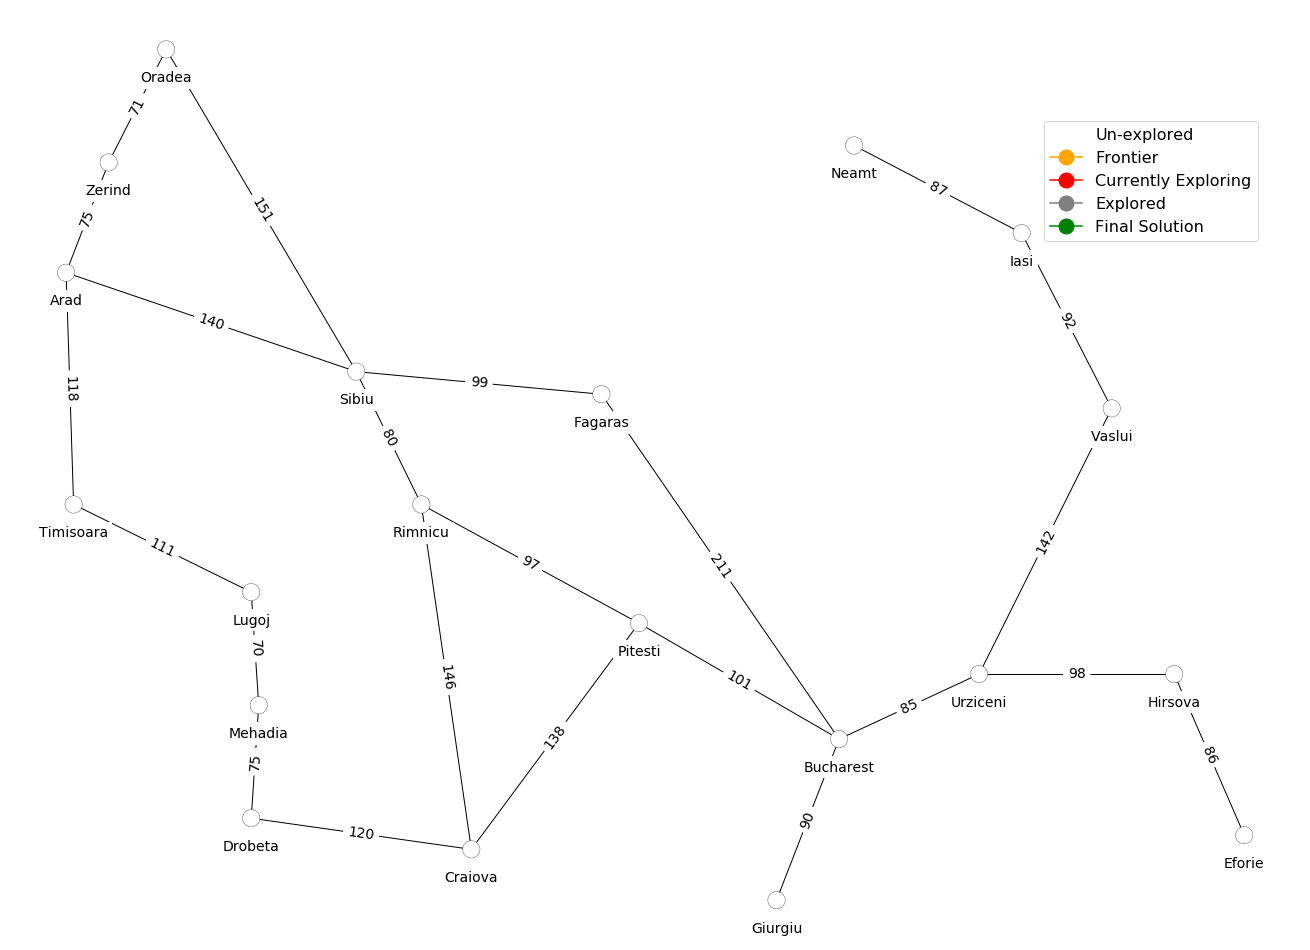

In [41]:
show_map(romania_graph_data)

<a id = 'SA'></a>
## VISUALIZACIÓN DE LOS ALGORITMOS DE BUSQUEDA (SEARCHING ALGORITHMS)

[return](#sps)

---
En esta sección abordamos los poderosos algoritmos que hemos visto:

1. [Breadth First Tree Search](#BFTS)
2. [Depth First Tree Search](#DFTS)
3. [Breadth First Search](#BFGS)
4. [Depth First Graph Search](#DFGS)
5. [Best First Search](#BFS)
6. [Uniform Cost Search](#UCS)
7. [Depth Limited Search](#DLS)
8. [Iterative Deepening Search](#IDS)
9. [Greedy Best First Search](#GBFS)
10. [A\*-Search](#AStar)

[Ejemplo de 8 Puzzle - GUI](#8puzzleGui)

[Tarea 4](#tarea4)

[Introducción a Busqueda de árbol en juegos](#BAJ)

---

La cosa será añadir colores a los nodos para ver que está pasando... entonces ->
* Un-explored nodes - <font color='black'>white</font>
* Frontier nodes - <font color='orange'>orange</font>
* Currently exploring node - <font color='red'>red</font>
* Already explored nodes - <font color='gray'>gray</font>

<a id = 'BFTS'></a>
## 1. BREADTH-FIRST TREE SEARCH

[return](#SA)

Veamos la modificación del este algoritmo para nuestro poderoso mapa de Romania (más detalles del algoritmo se encuentra en search.py)

In [42]:
def tree_breadth_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    #Adding first node to the queue
    frontier = deque([Node(problem.initial)])
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        #Popping first node of queue
        node = frontier.popleft()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def breadth_first_tree_search(problem):
    "Search the shallowest nodes in the search tree first."
    iterations, all_node_colors, node = tree_breadth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

Ahora, usamos `ipywidgets` para desplegar la barra deslizadora (`slider`), un botón (`button`) y nuestro mapa. 

Podemos interactuar con la barra deslizadora para apreciar los pasos **intermedios** en este y los siguientes algoritmos de busqueda.

In [43]:
### Si desean implementarlo de forma individual!

all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
a, b, c = breadth_first_tree_search(romania_problem)
display_visual(romania_graph_data, user_input=False, 
               algorithm=breadth_first_tree_search, 
               problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

<a id = 'DFTS'></a>
## 2. DEPTH-FIRST TREE SEARCH

[return](#SA)


Ahora veamos al comportamiento de este algoritmo.

In [44]:
def tree_depth_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    #Adding first node to the stack
    frontier = [Node(problem.initial)]
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        #Popping first node of stack
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def depth_first_tree_search(problem):
    "Search the deepest nodes in the search tree first."
    iterations, all_node_colors, node = tree_depth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

### Si desean implementarlo de forma individual!

all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=depth_first_tree_search, 
               problem=romania_problem)

<a id = 'BFGS'></a>
## 3. BREADTH-FIRST GRAPH SEARCH

[return](#SA)

Para este ejemplo, vamos a cambiar los colores de los nodos (`node_colors`) de la posición inicial y definir algunas declaraciones diferentes del problema. 

In [45]:
def breadth_first_search_graph(problem):
    "[Figure 3.11]"
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = deque([node])
    
    # modify the color of frontier nodes to blue
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    explored = set()
    while frontier:
        node = frontier.popleft()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state)     
        
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return(iterations, all_node_colors, child)
                frontier.append(child)

                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                    
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

### Si desean implementarlo de forma individual!

all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=breadth_first_search_graph, 
               problem=romania_problem)

<a id = 'DFGS'></a>
## 4. DEPTH-FIRST GRAPH SEARCH 

[return](#SA)

In [46]:
def graph_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    If two paths reach a state, only use the first one. [Figure 3.7]"""
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [(Node(problem.initial))]
    explored = set()
    
    # modify the color of frontier nodes to orange
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    while frontier:
        # Popping first node of stack
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in frontier:
            # modify the color of frontier nodes to orange
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None


def depth_first_graph_search(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node = graph_search_for_vis(problem)
    return(iterations, all_node_colors, node)

### Si desean implementarlo de forma individual!

all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=depth_first_graph_search, 
               problem=romania_problem)

<a id = 'BFS'></a>
## 5. BEST FIRST SEARCH

[return](#SA)

In [47]:
def best_first_graph_search_for_vis(problem, f):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

<a id = 'UCS'></a>
## 6. UNIFORM COST SEARCH

[return](#SA)

In [48]:
def uniform_cost_search_graph(problem):
    "[Figure 3.14]"
    #Uniform Cost Search uses Best First Search algorithm with f(n) = g(n)
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda node: node.path_cost)
    return(iterations, all_node_colors, node)

### Si desean implementarlo de forma individual!

all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=uniform_cost_search_graph, 
               problem=romania_problem)

<a id = 'DLS'></a>
## 7. DEPTH LIMITED SEARCH

[return](#SA)


In [49]:
def depth_limited_search_graph(problem, limit = -1):
    '''
    Perform depth first search of graph g.
    if limit >= 0, that is the maximum depth of the search.
    '''
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [Node(problem.initial)]
    explored = set()
    
    cutoff_occurred = False
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    while frontier:
        # Popping first node of queue
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)

        elif limit >= 0:
            cutoff_occurred = True
            limit += 1
            all_node_colors.pop()
            iterations -= 1
            node_colors[node.state] = "gray"

        
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in frontier:
            limit -= 1
            # modify the color of frontier nodes to orange
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return 'cutoff' if cutoff_occurred else None


def depth_limited_search_for_vis(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node = depth_limited_search_graph(problem)
    return(iterations, all_node_colors, node)    

### Si desean implementarlo de forma individual!

all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=depth_limited_search_for_vis, 
               problem=romania_problem)

<a id = 'IDS'></a>
## 8. ITERATIVE DEEPENING SEARCH

[return](#SA)

In [50]:
def iterative_deepening_search_for_vis(problem):
    for depth in range(sys.maxsize):
        iterations, all_node_colors, node=depth_limited_search_for_vis(problem)
        if iterations:
            return (iterations, all_node_colors, node)

### Si desean implementarlo de forma individual!

all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=iterative_deepening_search_for_vis, 
               problem=romania_problem)

<a id = 'GBFS'></a>
## 9. GREEDY BEST FIRST SEARCH

[return](#SA)

In [51]:
def greedy_best_first_search(problem, h=None):
    """Greedy Best-first graph search is an informative searching algorithm with f(n) = h(n).
    You need to specify the h function when you call best_first_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda n: h(n))
    return(iterations, all_node_colors, node)

### Si desean implementarlo de forma individual!

all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=greedy_best_first_search, 
               problem=romania_problem)

<a id = 'AStar'></a>
## 10. A\* SEARCH

[return](#SA)

In [52]:
def astar_search_graph(problem, h=None):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, 
                                                                lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)

### Si desean implementarlo de forma individual!

all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=astar_search_graph, 
               problem=romania_problem)

In [53]:
all_node_colors = []
# display_visual(romania_graph_data, user_input=True, algorithm=breadth_first_tree_search)
algorithms = {  "Breadth First Tree Search": tree_breadth_search_for_vis,
                "Depth First Tree Search": tree_depth_search_for_vis,
                "Breadth First Search": breadth_first_search_graph,
                "Depth First Graph Search": graph_search_for_vis,
                "Best First Graph Search": best_first_graph_search_for_vis,
                "Uniform Cost Search": uniform_cost_search_graph,
                "Depth Limited Search": depth_limited_search_for_vis,
                "Iterative Deepening Search": iterative_deepening_search_for_vis,
                "Greedy Best First Search": greedy_best_first_search,
                "A-star Search": astar_search_graph}
display_visual(romania_graph_data, algorithm=algorithms, user_input=True)

Dropdown(description='Search algorithm: ', index=3, options=('A-star Search', 'Best First Graph Search', 'Brea…

Dropdown(description='Start city: ', options=('Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', …

Dropdown(description='Goal city: ', index=5, options=('Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fa…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

## A* HEURISTICS

Heurísticas diferentes proporcionan eficiencias diferentes, generalmente están definidos por el número de nodos explorados, así como el factor de las ramas. 

Con el clásico problema `8-Puzzle`, podemos apreciar lo antes mencionado... ¿cómo?.

### 8 Puzzle Problem

El problema ya lo hemos platicado (*8 Puzzle Problem*), consisten en una matriz de 3x3 cuyo objetivo es llegar de la configuración inicial a la final al intercambiar las "fichas" enumeradas gracias al espacio en blanco que tenemos.  

Ejemplo:- 

              Initial State                        Goal State
              | 7 | 2 | 4 |                       | 1 | 2 | 3 |
              | 5 | 0 | 6 |                       | 4 | 5 | 6 |
              | 8 | 3 | 1 |                       | 7 | 8 | 0 |
              
<br>
Definamos nuestro objetivo entonces... 

In [54]:
goal = [1, 2, 3, 4, 5, 6, 7, 8, 0]

### Heuristicas :

1) Manhattan Distance:- Para este problema, la distancia está definida como: la distancia de un mosaico desde su estado objetivo (para el mosaico '1' en la configuración inicial, la distancia de Manhattan es 4 "2 para desplazamiento hacia la izquierda y 2 para desplazamiento hacia arriba").

2) No. de mosaicos perdidos: - La heurística calcula el número de mosaicos perdidos entre el estado actual y el estado objetivo.

3) Sqrt de la distancia de Manhattan: - Calcula la raíz cuadrada de la distancia de Manhattan.

4) Max Heuristic: - Asigna el puntaje como máximo entre "Distancia Manhattan" y "No. de Azulejos perdidos".

In [55]:
# Heuristics for 8 Puzzle Problem
import math

def linear(node):
    return sum([1 if node.state[i] != goal[i] else 0 for i in range(8)])

def manhattan(node):
    state = node.state
    index_goal = {0:[2,2], 1:[0,0], 2:[0,1], 3:[0,2], 4:[1,0], 5:[1,1], 6:[1,2], 7:[2,0], 8:[2,1]}
    index_state = {}
    index = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
    x, y = 0, 0
    
    for i in range(len(state)):
        index_state[state[i]] = index[i]
    
    mhd = 0
    
    for i in range(8):
        for j in range(2):
            mhd = abs(index_goal[i][j] - index_state[i][j]) + mhd
    
    return mhd

def sqrt_manhattan(node):
    state = node.state
    index_goal = {0:[2,2], 1:[0,0], 2:[0,1], 3:[0,2], 4:[1,0], 5:[1,1], 6:[1,2], 7:[2,0], 8:[2,1]}
    index_state = {}
    index = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
    x, y = 0, 0
    
    for i in range(len(state)):
        index_state[state[i]] = index[i]
    
    mhd = 0
    
    for i in range(8):
        for j in range(2):
            mhd = (index_goal[i][j] - index_state[i][j])**2 + mhd
    
    return math.sqrt(mhd)

def max_heuristic(node):
    score1 = manhattan(node)
    score2 = linear(node)
    return max(score1, score2)

Ahora podremos resolver el poderoso puzzle con el método `A*`

In [56]:
# Solving the puzzle 
puzzle = EightPuzzle((2, 4, 3, 1, 5, 6, 7, 8, 0))
puzzle.check_solvability((2, 4, 3, 1, 5, 6, 7, 8, 0)) # checks whether the initialized configuration is solvable or not

True

Entonces... parece que esto es solucionable...

La función por default nos regresa el número de cuadros desplazados.

In [57]:
astar_search(puzzle).solution()

['UP', 'LEFT', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN']

Utilizando diferentes heurísticas...

In [58]:
astar_search(puzzle, linear).solution()

['UP', 'LEFT', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN']

In [59]:
astar_search(puzzle, manhattan).solution()

['LEFT', 'UP', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT']

In [60]:
astar_search(puzzle, sqrt_manhattan).solution()

['LEFT', 'UP', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT']

In [61]:
astar_search(puzzle, max_heuristic).solution()

['LEFT', 'UP', 'UP', 'LEFT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT']

Aunque todas las funciones heurísticas dan casi la misma solución, la diferencia radica en los costos de computo.

Esto ya *calienta* (se aprecia la enorme diferencia que pudiera haber) en un escenario donde la eficiencia computacional es requerida...

Hagamos unas pruebas:

In [62]:
puzzle_1 = EightPuzzle((2, 4, 3, 1, 5, 6, 7, 8, 0))
puzzle_2 = EightPuzzle((1, 2, 3, 4, 5, 6, 0, 7, 8))
puzzle_3 = EightPuzzle((1, 2, 3, 4, 5, 7, 8, 6, 0))

Función Heurística: Lineal

In [63]:
%%timeit
astar_search(puzzle_1)
astar_search(puzzle_2)
astar_search(puzzle_3)

3.71 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
%%timeit
astar_search(puzzle_1, linear)
astar_search(puzzle_2, linear)
astar_search(puzzle_3, linear)

3.67 ms ± 299 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
%%timeit
astar_search(puzzle_1, manhattan)
astar_search(puzzle_2, manhattan)
astar_search(puzzle_3, manhattan)

2.87 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%%timeit
astar_search(puzzle_1, sqrt_manhattan)
astar_search(puzzle_2, sqrt_manhattan)
astar_search(puzzle_3, sqrt_manhattan)

37.9 ms ± 2.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
%%timeit
astar_search(puzzle_1, max_heuristic)
astar_search(puzzle_2, max_heuristic)
astar_search(puzzle_3, max_heuristic)

3.2 ms ± 290 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Podemos inferir que la heurística - manhattan - funciona bastante bien.

* La sqrt_manhattan contiene una operación extra (`sqrt`), la cual influye para hacerla más lenta con respecto a las otras.

* `max_heuristic` debia ser un poco más lenta dado que llama dos funciones, pero en este caso, dichos valores ya estaban calculados ahorrando tiempo!

Veamos ahora con una bonita GUI como funciona y tiene sentido lo que se ha visto hasta ahorita... ¿se podrá modificar para probar los ejemplos?

<a id = '8puzzleGui'></a>
## Ejemplo de 8 Puzzle - GUI

[return](#SA)

In [68]:
import os.path
import random
import time
from functools import partial
from tkinter import *

from search import astar_search, EightPuzzle

#sys.path.append(os.path.join(os.path.dirname(__file__), '..'))

root = Tk()

state = [1, 2, 3, 4, 5, 6, 7, 8, 0]
puzzle = EightPuzzle(tuple(state))
solution = None

b = [None] * 9


# TODO: refactor into OOP, remove global variables

def scramble():
    """Scrambles the puzzle starting from the goal state"""

    global state
    global puzzle
    possible_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
    scramble = []
    for _ in range(60):
        scramble.append(random.choice(possible_actions))

    for move in scramble:
        if move in puzzle.actions(state):
            state = list(puzzle.result(state, move))
            puzzle = EightPuzzle(tuple(state))
            create_buttons()


def solve():
    """Solves the puzzle using astar_search"""

    return astar_search(puzzle).solution()


def solve_steps():
    """Solves the puzzle step by step"""

    global puzzle
    global solution
    global state
    solution = solve()
    print(solution)

    for move in solution:
        state = puzzle.result(state, move)
        create_buttons()
        root.update()
        root.after(1, time.sleep(0.75))


def exchange(index):
    """Interchanges the position of the selected tile with the zero tile under certain conditions"""

    global state
    global solution
    global puzzle
    zero_ix = list(state).index(0)
    actions = puzzle.actions(state)
    current_action = ''
    i_diff = index // 3 - zero_ix // 3
    j_diff = index % 3 - zero_ix % 3
    if i_diff == 1:
        current_action += 'DOWN'
    elif i_diff == -1:
        current_action += 'UP'

    if j_diff == 1:
        current_action += 'RIGHT'
    elif j_diff == -1:
        current_action += 'LEFT'

    if abs(i_diff) + abs(j_diff) != 1:
        current_action = ''

    if current_action in actions:
        b[zero_ix].grid_forget()
        b[zero_ix] = Button(root, text=f'{state[index]}', width=6, font=('Helvetica', 40, 'bold'),
                            command=partial(exchange, zero_ix))
        b[zero_ix].grid(row=zero_ix // 3, column=zero_ix % 3, ipady=40)
        b[index].grid_forget()
        b[index] = Button(root, text=None, width=6, font=('Helvetica', 40, 'bold'), command=partial(exchange, index))
        b[index].grid(row=index // 3, column=index % 3, ipady=40)
        state[zero_ix], state[index] = state[index], state[zero_ix]
        puzzle = EightPuzzle(tuple(state))


def create_buttons():
    """Creates dynamic buttons"""

    # TODO: Find a way to use grid_forget() with a for loop for initialization
    b[0] = Button(root, text=f'{state[0]}' if state[0] != 0 else None, width=6, font=('Helvetica', 40, 'bold'),
                  command=partial(exchange, 0))
    b[0].grid(row=0, column=0, ipady=40)
    b[1] = Button(root, text=f'{state[1]}' if state[1] != 0 else None, width=6, font=('Helvetica', 40, 'bold'),
                  command=partial(exchange, 1))
    b[1].grid(row=0, column=1, ipady=40)
    b[2] = Button(root, text=f'{state[2]}' if state[2] != 0 else None, width=6, font=('Helvetica', 40, 'bold'),
                  command=partial(exchange, 2))
    b[2].grid(row=0, column=2, ipady=40)
    b[3] = Button(root, text=f'{state[3]}' if state[3] != 0 else None, width=6, font=('Helvetica', 40, 'bold'),
                  command=partial(exchange, 3))
    b[3].grid(row=1, column=0, ipady=40)
    b[4] = Button(root, text=f'{state[4]}' if state[4] != 0 else None, width=6, font=('Helvetica', 40, 'bold'),
                  command=partial(exchange, 4))
    b[4].grid(row=1, column=1, ipady=40)
    b[5] = Button(root, text=f'{state[5]}' if state[5] != 0 else None, width=6, font=('Helvetica', 40, 'bold'),
                  command=partial(exchange, 5))
    b[5].grid(row=1, column=2, ipady=40)
    b[6] = Button(root, text=f'{state[6]}' if state[6] != 0 else None, width=6, font=('Helvetica', 40, 'bold'),
                  command=partial(exchange, 6))
    b[6].grid(row=2, column=0, ipady=40)
    b[7] = Button(root, text=f'{state[7]}' if state[7] != 0 else None, width=6, font=('Helvetica', 40, 'bold'),
                  command=partial(exchange, 7))
    b[7].grid(row=2, column=1, ipady=40)
    b[8] = Button(root, text=f'{state[8]}' if state[8] != 0 else None, width=6, font=('Helvetica', 40, 'bold'),
                  command=partial(exchange, 8))
    b[8].grid(row=2, column=2, ipady=40)


def create_static_buttons():
    """Creates scramble and solve buttons"""

    scramble_btn = Button(root, text='Scramble', font=('Helvetica', 30, 'bold'), width=8, command=partial(init))
    scramble_btn.grid(row=3, column=0, ipady=10)
    solve_btn = Button(root, text='Solve', font=('Helvetica', 30, 'bold'), width=8, command=partial(solve_steps))
    solve_btn.grid(row=3, column=2, ipady=10)


def init():
    """Calls necessary functions"""

    global state
    global solution
    state = [1, 2, 3, 4, 5, 6, 7, 8, 0]
    scramble()
    create_buttons()
    create_static_buttons()


init()
root.mainloop()

### ¿Podrán añadir su interfaz para probar diversas heurísticas?

---
<a id = 'tarea4'></a>
# TAREA 4 - PROBLEMA DE LOS CANÍBALES Y LOS MISIONEROS

[return](#SA)

## DESCRIPCIÓN BREVE DEL PROBLEMA

Tres misioneros y tres caníbales se encuentran en el mismo lado de un rio junto con un bote que puede transportar a una o dos personas. Encuentra una manera de llevarlos al otro lado sin dejar que un grupo de misioneros sea sobrepasado en número por los caníbales.

![img](https://staticz.novelgames.com/flashgames/missionaries/screenshot_600x400.3.png)

## ESTADOS

Se define el espacio de estados especificando el número de caníbales y misioneros que hay en el punto de partida, mientras que b es 1 si el bote se encuentra en dicho lado del río y 0 en caso contrario.
$$  S \; = \{ (c,m,b) \; | \; c,m \in \{ 0,1,2,3 \} \; b \in \{ 0, 1\} \}$$
Es claro que no es necesario especificar los elementos ya mencionados para el otro lado del río.
El conjunto I contiene los estados no válidos, es decir, aquellos donde el número de canibales supera al de misioneros en un lado del río.
$$  I \; = \{ (3,1,b), (3,2,b), (2,1,b), (1,2,b), (0,1,b), (0,2,b)  \} $$

Por lo tanto el **estado inicial** es $(3,3,1)$ y la **meta** es $(0,0,0)$.

---

## ACCIONES

Las acciones se describe como el conjunto de las posibles parejas ordenadas de caníbales y misioneros que cumplen las restricciones dadas para que un viaje se lleve a cabo, estas son debe haber al menos un pasajero y un máximo de dos. 
El signo indica la dirección del viaje: $-$ representa un viaje del lado inicial al final y $+$ el caso contrario.
$$  A \; = \{ -(0,1),-(0,2),-(1,0),-(1,1),-(2,0), +(0,1),+(0,2),+(1,0),+(1,1),+(2,0) \} $$
Se elegió esta representación pues un viaje en el bote incrementará o disminuirá el número de personas en el lado inicial.

## MODELO DE TRANSICIÓN

Dado un estado $(c,m,b)$ una acción es sumar $(a_c,a_m)\in A$ a las entradas correspondientes del estado actual siempre que la pareja sea permitida, esto es, si $b=1$ (el bote está en el lado inicial) entonces $a_c \leq c$ y $a_m \leq m$; en cambio si $b=0$ entonces  $a_c \leq 3-c$ y $a_m \leq 3-m$.

El modelo de transición queda descrito por la función de transición:

$$  f:\; S \, \times \, A \rightarrow \; S $$

$$ f\,\big(\,(c,m,b),(a_c,a_m)\,\big)\, = \big(\,c + (-1)^b a_c, \, m + (-1)^b a_m, \, b+1 \;mod\; 2\,\big) $$

![img](https://www.cs.us.es/~fsancho/images/2017-09/mc-search-space.png)

In [69]:
class Estado:

    def __init__(self,c,m,b=1):
        self.c = c
        self.m = m
        self.b = b

    def setm(self, m):
        self.m = m

    def setc(self, c):
        self.c = c
    
    def setb(self,b):
        self.b = b

    def getm(self):
        return self.m

    def getc(self):
        return self.c
    
    def getb(self):
        return self.b

    def isValid(self):
        return (self.c,self.m) not in [(3,1), (3,2), (2,1), (1,2), (0,1), (0,2)]

    def __repr__(self):
        return "({},{}) b = {}".format(self.c,self.m,self.b)
                                                      
    def __eq__(self, other):
        return self.c == other.c and self.m == other.m and self.b == other.b
    
    def __hash__(self):
        return hash((self.c,self.m,self.b))

failState = Estado(-1,-1)

In [70]:
class Problem(object):

    """The abstract class for a formal problem. You should subclass0
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost. Then you will create instances
    of your subclass and solve them with the various search functions."""

    def __init__(self, initial, goal=None):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        if isinstance(self.goal, list):
            return is_in(state, self.goal)
        else:
            return state == self.goal

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2.  If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        return c + 1

    def value(self, state):
        """For optimization problems, each state has a value.  Hill-climbing
        and related algorithms try to maximize this value."""
        raise NotImplementedError

In [71]:
import math

class Node:

    """A node in a search tree. Contains a pointer to the parent (the node
    that this is a successor of) and to the actual state for this node. Note
    that if a state is arrived at by two paths, then there are two nodes with
    the same state.  Also includes the action that got us to this state, and
    the total path_cost (also known as g) to reach the node.  Other functions
    may add an f and h value; see best_first_graph_search and astar_search for
    an explanation of how the f and h values are handled. You will not need to
    subclass this class."""

    def __init__(self, state, parent=None, action=None, path_cost=0):
        """Create a search tree Node, derived from a parent by an action."""
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def __repr__(self):
        if self.action == None:
            sgn = ''
        elif self.state.getb():
            sgn = '+'
        else:
            sgn = '-'
        return "<Node parent_action: {}{}, state: {},  depth: {}>".format(sgn,self.action, self.state, self.depth)

    def expand(self, problem):
        """List the nodes reachable in one step from this node."""
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        """[Figure 3.10]"""
        next_state = problem.result(self.state, action)
        next_node = Node(next_state, self, action,
                    problem.path_cost(self.path_cost, self.state,
                                      action, next_state))
        return next_node
    
    def solution(self):
        """Return the sequence of actions to go from the root to this node."""
        return [node.action for node in self.path()[1:]]

    def path(self):
        """Return a list of nodes forming the path from the root to this node."""
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))
    
    def getDepth(self):
        return self.depth

failure = Node(failState, path_cost=math.inf) # Indicates an algorithm couldn't find a solution.

In [72]:
class Cym(Problem):

    initial = Estado(3,3,1)
    goal = Estado(0,0,0)
    
    def __init__(self):
        Problem.__init__(self,self.initial,self.goal)

    def actions(self, estado):
        actions = []
        if estado.getb() == 1: # es 1, es decir, va a transportar personas del lado inicial al final
            if estado.c >= 2:
                actions = actions + [(1,0),(2,0)]
                if estado.m >= 2:
                    actions = actions + [(0,1),(0,2),(1,1)]
                elif estado.m == 1:
                    actions = actions + [(0,1),(1,1)]
            elif estado.c == 1:
                actions.append((1,0))
                if estado.m >= 2:
                    actions = actions + [(0,1),(0,2),(1,1)]
                elif estado.m == 1:
                    actions = actions + [(0,1),(1,1)]
        else: # es 0, es decir, va a transportar personas del lado final al inicial 
            if 3-estado.c >= 2:
                actions = actions + [(1,0),(2,0)]
                if 3-estado.m >= 2:
                    actions = actions + [(0,1),(0,2),(1,1)]
                elif 3-estado.m == 1:
                    actions = actions + [(0,1),(1,1)]
            elif 3-estado.c == 1:
                actions.append((1,0))
                if 3-estado.m >= 2:
                    actions = actions + [(0,1),(0,2),(1,1)]
                elif 3-estado.m == 1:
                    actions = actions + [(0,1),(1,1)]
        return actions
    
    def result(self, state, action):
        if state.getb() == 1: # va a restar 
            nuevo = Estado(state.getc()-action[0], state.getm()-action[1], (state.getb()+1)%2)
        else: # va a sumar
            nuevo = Estado(state.getc()+action[0], state.getm()+action[1], (state.getb()+1)%2)
        if nuevo.isValid(): # checar si los canibales no sobrepasan a los misioneros
            return nuevo
        else:
            return failState
        
    def goal_test(self, state):
        return state == self.goal

In [73]:
from collections import deque

FIFOQueue = deque

def breadth_first_search(problem):
    "Search shallowest nodes in the search tree first."
    node = Node(problem.initial)
    if problem.goal_test(problem.initial):
        return node
    frontier = FIFOQueue([node])
    reached = {problem.initial}
    while frontier:
        node = frontier.pop()
        for child in node.expand(problem):
            s = child.state
            if problem.goal_test(s):
                return child
            if s not in reached:
                reached.add(s)
                frontier.appendleft(child)
    return failure


In [74]:
problema = Cym()
bfs = breadth_first_search(problema)
for node in bfs.path():
    print(node)

<Node parent_action: None, state: (3,3) b = 1,  depth: 0>
<Node parent_action: -(2, 0), state: (1,3) b = 0,  depth: 1>
<Node parent_action: +(1, 0), state: (2,3) b = 1,  depth: 2>
<Node parent_action: -(2, 0), state: (0,3) b = 0,  depth: 3>
<Node parent_action: +(1, 0), state: (1,3) b = 1,  depth: 4>
<Node parent_action: -(0, 2), state: (1,1) b = 0,  depth: 5>
<Node parent_action: +(1, 1), state: (2,2) b = 1,  depth: 6>
<Node parent_action: -(0, 2), state: (2,0) b = 0,  depth: 7>
<Node parent_action: +(1, 0), state: (3,0) b = 1,  depth: 8>
<Node parent_action: -(2, 0), state: (1,0) b = 0,  depth: 9>
<Node parent_action: +(1, 0), state: (2,0) b = 1,  depth: 10>
<Node parent_action: -(2, 0), state: (0,0) b = 0,  depth: 11>


---
<a id = 'LS'></a>
# Local Search

[return](#sps)

---

---
En esta sección abordamos los poderosos algoritmos que hemos visto:

1. [Hill Climbing](#HC)
2. [Simulated Anneling](#SimA)
3. [Genetic Algorithm](#GA)
    * [GA GUI](#gaGUI)
    
[Ejemplos con 8 Reinas](#8Q)

---
<a id = 'HC'></a>
### HILL CLIMBING

[return](#LS)

Hill Climbing es una busqueda heurística utilizada para problemas de optimización. Dado un gran conjunto de entradas y una buena heurística, trata de encontrar una solución lo suficientemente buena para el problema. Esta solución puede ser o no ser un óptimo global.

![img](https://2.bp.blogspot.com/-e8I9DIhPol4/Vaw0iUSHAUI/AAAAAAAABpY/72nIZSqPSXY/w1200-h630-p-k-no-nu/h3.PNG)

   * ¿Qué es una heurística?
        * Disponen de alguna información sobre la proximidad de cada estado a un estado objetivo, lo que permite explorar en primer lugar los caminos más prometedores.
        
Pero... tenemos algunos detalles a considerar:
* No garantizan que se encuentre una solución, aunque sí existan soluciones.
* Si encuentran una solución, no se asegura que ésta tenga las mejores propiedades (que sea de longitud mínima o de coste óptimo).
* En algunas ocasiones (que, en general, no se podrán determinar apriori), encontrarán una solución (aceptablemente buena) en un tiempo razonable.


![img](https://www.cs.us.es/~fsancho/images/2018-09/vns.gif)

---
En general, los métodos heurísticos son preferibles a los métodos no informados en la solución de problemas difíciles para los que una búsqueda exhaustiva necesitaría un tiempo demasiado grande. 
Esto cubre prácticamente la totalidad de los problemas reales que interesan en IA.

---

La función heurística puede tener dos interpretaciones. Por una parte, la función puede ser una estimación de lo próximo que se encuentra el estado de un estado objetivo. Bajo esta perspectiva, los estados de menor valor heurístico son los preferidos. Pero en otros casos puede suceder que lo que convenga sea maximizar esa función.

![img](https://qph.fs.quoracdn.net/main-qimg-1e7cd9b39dd99c63e319d0367b7223cb)

<br>
Regresando al buen algoritmo de Hill Climbing, funciona de la siguiente manera:

- Evaluamos el estado inicial. 
- Si es igual al estado final, terminamos...
    - Encontremos los estados vecinos (con alguna heurística similar al estado actual)
    - Evaluamos este estado. Si está más cerca del estado final que antes, reemplazamos el estado inicial con este estado y repetimos los pasos.

In [75]:
psource(hill_climbing)

Vamos a encontrar una solución aproximada al problema del viajero.

In [76]:
class TSP_problem(Problem):

    """ subclass of Problem to define various functions """

    def two_opt(self, state):
        """ Neighbour generating function for Traveling Salesman Problem """
        neighbour_state = state[:]
        left = random.randint(0, len(neighbour_state) - 1)
        right = random.randint(0, len(neighbour_state) - 1)
        if left > right:
            left, right = right, left
        neighbour_state[left: right + 1] = reversed(neighbour_state[left: right + 1])
        return neighbour_state

    def actions(self, state):
        """ action that can be excuted in given state """
        return [self.two_opt]

    def result(self, state, action):
        """  result after applying the given action on the given state """
        return action(state)

    def path_cost(self, c, state1, action, state2):
        """ total distance for the Traveling Salesman to be covered if in state2  """
        cost = 0
        for i in range(len(state2) - 1):
            cost += distances[state2[i]][state2[i + 1]]
        cost += distances[state2[0]][state2[-1]]
        return cost

    def value(self, state):
        """ value of path cost given negative for the given state """
        return -1 * self.path_cost(None, None, None, state)

Reusemos las ciudades (`Romania map`) para este problema.

In [77]:
distances = {}
all_cities = []

for city in romania_map.locations.keys():
    distances[city] = {}
    all_cities.append(city)
    
all_cities.sort()
print(all_cities)

['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']


Ahora, necesitamos 'poblar' las listas individuales dentro del diccionario usando la distancia manhattan entre las ciudades.

In [78]:
import numpy as np
for name_1, coordinates_1 in romania_map.locations.items():
        for name_2, coordinates_2 in romania_map.locations.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

La forma en que se eligen los vecinos actualmente no es adecuada para el problema de los vendedores ambulantes.
Necesitamos un estado vecino que sea similar en la distancia total del camino al estado actual.

Necesitamos cambiar la función que encuentra vecinos.

In [79]:
def hill_climbing(problem):
    
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    
    def find_neighbors(state, number_of_neighbors=100):        
        neighbors = []
        
        for i in range(number_of_neighbors):
            new_state = problem.two_opt(state)
            neighbors.append(Node(new_state))
            state = new_state
            
        return neighbors

    # as this is a stochastic algorithm, we will set a cap on the number of iterations
    iterations = 10000
    
    current = Node(problem.initial)
    while iterations:
        neighbors = find_neighbors(current.state)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            current.state = neighbor.state
        iterations -= 1
        
    return current.state

In [80]:
tsp = TSP_problem(all_cities)

In [81]:
hill_climbing(tsp)

['Hirsova',
 'Craiova',
 'Zerind',
 'Iasi',
 'Giurgiu',
 'Mehadia',
 'Neamt',
 'Timisoara',
 'Sibiu',
 'Eforie',
 'Vaslui',
 'Rimnicu',
 'Bucharest',
 'Urziceni',
 'Drobeta',
 'Lugoj',
 'Pitesti',
 'Arad',
 'Oradea',
 'Fagaras']

The solution looks like this.
It is not difficult to see why this might be a good solution.
<br>
![title](images/hillclimb-tsp.png)

<a id ='SimA'></a>
## SIMULATED ANNEALING

[return](#LS)

La idea detrás del algoritmo de Hill Climbing es desarrollar una `metafora` de ir escalando por gráfica de la función para encontrar su pico.

Sin embargo, hay un problema. Para encontrar la colina más alta, tomamos un paso a la vez, siempre hacia arriba, esperando encontrar el punto más alto...

Pero si no tenemos suerte, terminaremos en otro punto menos en aquel que es designado como "el punto más alto".

---

Si todos los estados vecinos tienen el mismo valor, no podremos saber cual es el óptimo global usando este algoritmo...

---

El recocido simulado es similar a este algoritmo, pero en lugar de elegir "el mejor movimiento" en cada iteración, selecciona uno al azar. Si este movimiento aleatorio nos acerca al óptimo global, será aceptado, caso contrario, el algoritmo puede aceptar o rechazar el movimiento basado en la probabilidad dictada por la `temperatura`.

Cuando la temperatura es alta, el algoritmo básicamente acepta el movimiento aleatorio, aún cuando no sea bueno.

A bajas temperaturas, sólo buenos movimientos son aceptados, con alguna que otra excepción. Esto permite la exploración del espacio de estados y previene que el algoritmo se quede atorado en un óptimo local.

In [82]:
psource(simulated_annealing)

La temperatura se reduce gradualmente a lo largo de la iteración.
Esto se realiza mediante una rutina de programación.
La implementación actual usa una disminución exponencial de la temperatura, pero podemos usar una rutina de programación diferente en su lugar.

In [83]:
psource(exp_schedule)

A continuación, definiremos un problema de búsqueda de picos e intentaremos resolverlo mediante el recocido simulado. Primero definamos la cuadrícula y el estado inicial.

In [84]:
initial = (0, 0)
grid = [[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 1]]

Queremos permitir sólo cuatro direcciones, a saber, N, S, E y W. Usemos el diccionario de direcciones.

In [85]:
directions4

{'W': (-1, 0), 'N': (0, 1), 'E': (1, 0), 'S': (0, -1)}

Defina un problema con estos parámetros.

In [86]:
problem = PeakFindingProblem(initial, grid, directions4)

Ejecutaremos simulated_annealing varias veces y almacenaremos las soluciones en un conjunto.

In [87]:
solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}

In [88]:
max(solutions)

9



Por tanto, el valor máximo es 9.

Encontremos el pico de una distribución gaussiana bidimensional. Usaremos la función gaussian_kernel de notebook.py para obtener la distribución.

In [89]:
grid = gaussian_kernel()

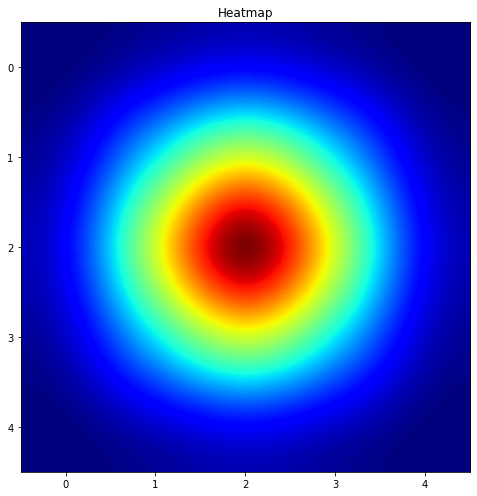

In [90]:
heatmap(grid, cmap='jet', interpolation='spline16')

Definamos el problema. Esta vez, permitiremos el movimiento en ocho direcciones como se define en las direcciones8.

In [91]:
directions8

{'W': (-1, 0),
 'N': (0, 1),
 'E': (1, 0),
 'S': (0, -1),
 'NW': (-1, 1),
 'NE': (1, 1),
 'SE': (1, -1),
 'SW': (-1, -1)}

In [92]:
problem = PeakFindingProblem(initial, grid, directions8)

In [93]:
%%timeit
solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}

239 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [94]:
max(solutions)

9

El pico está en 1.0, que es cómo se definen las distribuciones gaussianas.

Si lo intentan con el Hill-Climbing, es aproximadamente 24 veces más rápido que el recocido simulado (toma en cuenta que ejecutamos Simulated Annealing durante 100 iteraciones, mientras que si tu lo haces para el Hill Climbing lo harás una vez).
El recocido simulado compensa su tardanza por su capacidad para ser aplicable en un mayor número de escenarios que el escalada, como se ilustra en el siguiente ejemplo.

---

Ahora, definamos una superficie 2D como una matriz.

In [95]:
grid = [[0, 0, 0, 1, 4], 
        [0, 0, 2, 8, 10], 
        [0, 0, 2, 4, 12], 
        [0, 2, 4, 8, 16], 
        [1, 4, 8, 16, 32]]

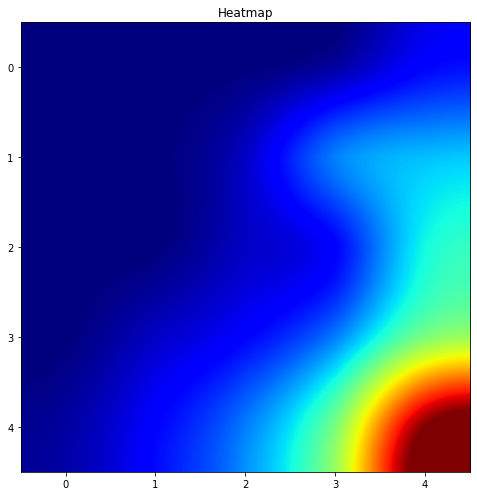

In [96]:
heatmap(grid, cmap='jet', interpolation='spline16')

El valor máximo es 32 en la esquina inferior derecha.
La región de la esquina superior izquierda es plana.

Creemos una última instancia de PeakFindingProblem.

In [97]:
problem = PeakFindingProblem(initial, grid, directions8)

In [98]:
solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
max(solutions)

32

<a id = 'GA'></a>
## GENETIC ALGORITHM
[return](#LS)

Estos algoritmos están inspirados en la evoluación natural y son particularmente útiles en optimización y en problemas de búsqueda con una gran cantidad de estados en el espacio.

---

Dado un problema, los algoritmos en el dominio hacen uso de una `población de soluciones` (llamados estados...), donde cada solución/estado representa una solución factible.

En cada iteración (**generación**), la población se actualiza utilizando métodos inspirados en la biología y la evolución (crossover, mutation, natural selection).

---

Antes de continuar, veamos la terminología básica.

* Individual/State: A list of elements (called *genes*) that represent possible solutions.

* Population: The list of all the individuals/states.

* Gene pool: The alphabet of possible values for an individual's genes.

* Generation/Iteration: The number of times the population will be updated.

* Fitness: An individual's score, calculated by a function specific to the problem.

### Crossover

Dos individuos / estados pueden "aparearse" y tener un hijo. Esta descendencia tiene características de ambos padres. Hay muchas formas en que podemos implementar este crossover. Aquí echaremos un vistazo a los más comunes. La mayoría de los otros métodos son variaciones de los siguientes.

* Point Crossover: El cruce se produce alrededor de uno (o más) puntos. Los padres se "dividen" en el punto o puntos elegidos y luego se fusionan. En el siguiente ejemplo, vemos que dos padres se dividen y fusionan en el tercer dígito, produciendo la siguiente descendencia después del cruce.

![point crossover](images/point_crossover.png)

* Uniform Crossover: Este tipo de cruce elige al azar los genes que se fusionarán. Aquí los genes 1, 2 y 5 se eligieron del primer padre, por lo que los genes 3, 4 fueron añadidos por el segundo padre.

![uniform crossover](images/uniform_crossover.png)

### Mutation

Cuando se produce una descendencia, existe la posibilidad de que mute, teniendo uno (o más, dependiendo de la implementación) de sus genes alterados.

Por ejemplo, digamos que el nuevo individuo que experimentará la mutación es "abcde". Elegimos al azar cambiar su tercer gen a 'z'. El individuo ahora se convierte en "abzde" y se agrega a la población.

### Selection

En cada iteración, los individuos más aptos se seleccionan al azar para aparearse y producir descendencia. Medimos la aptitud de un individuo con una *función de aptitud*. Esa función depende del problema dado y se usa para calificar a un individuo. Por lo general, cuanto más alto, mejor.

El proceso de selección es este:

1) Los individuos son calificados por la función de aptitud.

2) Los individuos se eligen al azar, de acuerdo con su puntaje (un puntaje más alto significa una mayor probabilidad de ser elegido). Por lo general, la fórmula para calcular la posibilidad de elegir un individuo es la siguiente (para la población * P * y el individuo * i *):

$$ chance(i) = \dfrac{fitness(i)}{\sum_{k \, in \, P}{fitness(k)}} $$

### Implementación

A continuación, analizamos la implementación del algoritmo en el módulo de búsqueda.

Primero la implementación del núcleo principal del algoritmo:

In [99]:
psource(genetic_algorithm)

El algoritmo toma en consideración las siguientes entradas...

* `population`: The initial population.

* `fitness_fn`: The problem's fitness function.

* `gene_pool`: The gene pool of the states/individuals. By default 0 and 1.

* `f_thres`: The fitness threshold. If an individual reaches that score, iteration stops. By default 'None', which means the algorithm will not halt until the generations are ran.

* `ngen`: The number of iterations/generations.

* `pmut`: The probability of mutation.

El algoritmo proporciona como salida al estado con el mayor puntaje.

Para cada generación, el algoritmo actualiza la población. Primero calcula la aptitud de los individuos, luego selecciona los más aptos y finalmente los cruza para producir descendencia. Existe la posibilidad de que la descendencia mute, dada por "pmut". Si al final de la generación un individuo alcanza el umbral de aptitud, el algoritmo se detiene y devuelve ese individuo.

La función de apareamiento se logra mediante el método `recombine`:

In [100]:
psource(recombine)

El método elige al azar un punto y fusiona los padres (x , y) a su alrededor.

La mutación se realiza en el método mutate:

In [101]:
psource(mutate)

Elegimos un gen en x para mutar y un gen del acervo genético para reemplazarlo.

Para ayudar a inicializar la población, tenemos la función auxiliar init_population:

In [102]:
psource(init_population)

La función toma como entrada el número de individuos en la población, el acervo genético y la longitud de cada individuo / estado. Crea individuos con genes aleatorios y devuelve la población cuando se hace.

### Explicación

Antes de resolver problemas usando el algoritmo genético, explicaremos cómo entender intuitivamente el algoritmo usando un ejemplo trivial.

#### Generating Phrases

En este problema, utilizamos un algoritmo genético para generar una frase objetivo particular a partir de una población de cadenas aleatorias. Este es un ejemplo clásico que ayuda a desarrollar la intuición sobre cómo usar este algoritmo también en otros problemas. Antes de analizar el problema, intentemos forzar la solución a la fuerza bruta. Digamos que queremos generar la frase "algoritmo genético". La frase tiene 17 caracteres. Podemos utilizar cualquier carácter de los 26 caracteres en minúscula y el carácter de espacio. Para generar una frase aleatoria de longitud 17, cada espacio se puede llenar de 27 formas. Entonces, el número total de frases posibles es

$$ 27 ^ {17} = 2153693963075557766310747 $$

que es un número enorme. Si quisiéramos generar la frase "Algoritmo genético", también tendríamos que incluir los 26 caracteres en mayúscula en consideración, aumentando así el espacio muestral de 27 caracteres a 53 caracteres y el número total de frases posibles entonces sería

$$ 53 ^ {17} = 205442259656281392806087233013 $$

Si quisiéramos incluir puntuaciones y números en el espacio muestral, habríamos complicado aún más un problema ya imposible. Por lo tanto, la fuerza bruta no es una opción. Ahora aplicaremos el algoritmo genético y veremos cómo reduce significativamente el espacio de búsqueda. Básicamente, queremos *evolucionar* nuestra población de cadenas aleatorias para que se aproximen mejor a la frase objetivo a medida que aumenta el número de generaciones. 

Los algoritmos genéticos funcionan según el principio de la selección natural darwiniana, según el cual, hay tres conceptos clave que deben estar en su lugar para que ocurra la evolución. Son:

* **Heredity**: There must be a process in place by which children receive the properties of their parents. 

Para este problema particular, dos cadenas de la población se elegirán como padres y se dividirán en un índice aleatorio y se recombinarán como se describe en la función "recombinar" para crear un hijo. Esta cadena secundaria luego se agregará a la nueva generación.


* **Variation**: There must be a variety of traits present in the population or a means with which to introduce variation. 

Si no hay variación en el espacio muestral, es posible que nunca alcancemos el óptimo global. Para asegurarnos de que haya suficiente variación, podemos inicializar una población grande, pero esto se vuelve computacionalmente costoso a medida que la población aumenta. Por lo tanto, a menudo usamos otro método llamado mutación. En este método, cambiamos aleatoriamente uno o más caracteres de algunas cadenas en la población en función de un valor de probabilidad predefinido llamado tasa de mutación o probabilidad de mutación como se describe en la función "mutar". La tasa de mutación generalmente se mantiene bastante baja. Una tasa de mutación de cero no logra introducir variación en la población y una tasa de mutación alta (digamos 50%) es tan buena como lanzar una moneda y la población no se beneficia de las recombinaciones anteriores. Debe mantenerse un equilibrio óptimo entre el tamaño de la población y la tasa de mutación para reducir el costo computacional y tener suficiente variación en la población.


* **Selection**: There must be some mechanism by which some members of the population have the opportunity to be parents and pass down their genetic information and some do not. This is typically referred to as "survival of the fittest".

Tiene que haber alguna forma de determinar qué frases de nuestra población tienen más posibilidades de convertirse eventualmente en la frase objetivo. Esto se hace mediante la introducción de una función de aptitud que calcula qué tan cerca está la frase generada de la frase de destino. La función simplemente devolverá un valor escalar correspondiente al número de caracteres coincidentes entre la frase generada y la frase de destino.



## Ejemplo

In [103]:
target = 'Genetic Algorithm'

Necesitamos definir nuestro acervo genético, es decir, los elementos de los que podría formar parte un individuo de la población. Aquí, el acervo genético contiene todas las letras mayúsculas y minúsculas del alfabeto inglés y el carácter de espacio.



In [104]:
# The ASCII values of uppercase characters ranges from 65 to 91
u_case = [chr(x) for x in range(65, 91)]
# The ASCII values of lowercase characters ranges from 97 to 123
l_case = [chr(x) for x in range(97, 123)]

gene_pool = []
gene_pool.extend(u_case) # adds the uppercase list to the gene pool
gene_pool.extend(l_case) # adds the lowercase list to the gene pool
gene_pool.append(' ')    # adds the space character to the gene pool

Ahora necesitamos definir el tamaño máximo de cada población. Las poblaciones más grandes tienen más variación, pero computacionalmente son más caras para ejecutar algoritmos.

In [105]:
max_population = 100

Como nuestra población no es muy grande, podemos permitirnos mantener una tasa de mutación relativamente grande.

In [106]:
mutation_rate = 0.07 # 7%

¡Excelente! Ahora, necesitamos definir la métrica más importante para el algoritmo genético, es decir, la función de aptitud. Esto simplemente devolverá el número de caracteres coincidentes entre la muestra generada y la frase de destino.

In [107]:
def fitness_fn(sample):
    # initialize fitness to 0
    fitness = 0
    for i in range(len(sample)):
        # increment fitness by 1 for every matching character
        if sample[i] == target[i]:
            fitness += 1
    return fitness

Antes de ejecutar nuestro algoritmo genético, necesitamos inicializar una población aleatoria. Usaremos la función init_population para hacer esto. Necesitamos pasar el tamaño máximo de la población, el acervo genético y la longitud de cada individuo, que en este caso será la misma que la longitud de la frase objetivo.

In [108]:
population = init_population(max_population, gene_pool, len(target))

Ahora definiremos cómo deben cambiar los individuos de la población a medida que aumenta el número de generaciones. Primero, la función de selección se ejecutará en la población para seleccionar dos individuos con altos valores de aptitud. Estos serán los padres que luego se recombinarán utilizando la función de recombinación para generar el hijo.

In [109]:
parents = select(2, population, fitness_fn) 

In [110]:
# The recombine function takes two parents as arguments, so we need to unpack the previous variable
child = recombine(*parents)

A continuación, debemos aplicar una mutación de acuerdo con la tasa de mutación. Llamamos a la función de mutación en el niño con el acervo genético y la tasa de mutación como argumentos adicionales.

In [111]:
child = mutate(child, gene_pool, mutation_rate)

Las líneas anteriores se pueden condensar en

* child = mutate(recombine(*select(2, population, fitness_fn)), gene_pool, mutation_rate)

Y necesitamos hacer esto para cada individuo en la población actual para generar la nueva población.

In [112]:
population = [mutate(recombine(*select(2, population, fitness_fn)), gene_pool, mutation_rate) for i in range(len(population))]

A continuación, se puede encontrar al individuo con el mayor estado físico utilizando la función max.

In [113]:
current_best = max(population, key=fitness_fn)

In [114]:
print(current_best)

['j', 'f', 'c', ' ', 'D', 'J', 'y', 'T', 'A', 'T', 'J', 'y', 'm', 'g', 't', 'e', 'm']


Vemos que esta es una lista de personajes. Esto se puede convertir en una cadena usando la función de unión

In [115]:
current_best_string = ''.join(current_best)
print(current_best_string)

jfc DJyTATJymgtem


Ahora necesitamos definir las condiciones para terminar el algoritmo. Esto puede pasar de dos maneras

    Terminación después de un número predefinido de generaciones
    Terminación cuando la aptitud del mejor individuo de la generación actual alcanza un valor umbral predefinido.

Definimos estas variables a continuación

In [116]:
ngen = 1200 # maximum number of generations
# we set the threshold fitness equal to the length of the target phrase
# i.e the algorithm only terminates whne it has got all the characters correct 
# or it has completed 'ngen' number of generations
f_thres = len(target)

Para generar un número ngen de generaciones, ejecutamos un bucle for ngen número de veces. 

Después de cada generación, calculamos la aptitud del mejor individuo de la generación y la comparamos con el valor de f_thres utilizando la función fitness_threshold. Después de cada generación, imprimimos el mejor individuo de la generación y el valor de aptitud correspondiente. Escribamos ahora una función para hacer esto.

In [117]:
def genetic_algorithm_stepwise(population, fitness_fn, gene_pool=[0, 1], f_thres=None, ngen=1200, pmut=0.1):
    for generation in range(ngen):
        population = [mutate(recombine(*select(2, population, fitness_fn)), gene_pool, pmut) for i in range(len(population))]
        # stores the individual genome with the highest fitness in the current population
        current_best = ''.join(max(population, key=fitness_fn))
        print(f'Current best: {current_best}\t\tGeneration: {str(generation)}\t\tFitness: {fitness_fn(current_best)}\r', end='')
        
        # compare the fitness of the current best individual to f_thres
        fittest_individual = fitness_threshold(fitness_fn, f_thres, population)
        
        # if fitness is greater than or equal to f_thres, we terminate the algorithm
        if fittest_individual:
            return fittest_individual, generation
    return max(population, key=fitness_fn) , generation       

La función definida anteriormente es esencialmente la misma que la definida en search.py ​​con la funcionalidad adicional de imprimir los datos de cada generación.

In [118]:
psource(genetic_algorithm)

In [119]:
population = init_population(max_population, gene_pool, len(target))
solution, generations = genetic_algorithm_stepwise(population, fitness_fn, gene_pool, f_thres, ngen, mutation_rate)

<a id ='gaGUI'></a>
## Ahora con una bonita GUI!
[return](#LS)

In [120]:
import os.path
from tkinter import *
from tkinter import ttk

import search

#sys.path.append(os.path.join(os.path.dirname(__file__), '..'))

LARGE_FONT = ('Verdana', 12)
EXTRA_LARGE_FONT = ('Consolas', 36, 'bold')

canvas_width = 800
canvas_height = 600

black = '#000000'
white = '#ffffff'
p_blue = '#042533'
lp_blue = '#0c394c'

# genetic algorithm variables
# feel free to play around with these
target = 'Genetic Algorithm'  # the phrase to be generated
max_population = 100  # number of samples in each population
mutation_rate = 0.1  # probability of mutation
f_thres = len(target)  # fitness threshold
ngen = 1200  # max number of generations to run the genetic algorithm

generation = 0  # counter to keep track of generation number

u_case = [chr(x) for x in range(65, 91)]  # list containing all uppercase characters
l_case = [chr(x) for x in range(97, 123)]  # list containing all lowercase characters
punctuations1 = [chr(x) for x in range(33, 48)]  # lists containing punctuation symbols
punctuations2 = [chr(x) for x in range(58, 65)]
punctuations3 = [chr(x) for x in range(91, 97)]
numerals = [chr(x) for x in range(48, 58)]  # list containing numbers

# extend the gene pool with the required lists and append the space character
gene_pool = []
gene_pool.extend(u_case)
gene_pool.extend(l_case)
gene_pool.append(' ')


# callbacks to update global variables from the slider values
def update_max_population(slider_value):
    global max_population
    max_population = slider_value


def update_mutation_rate(slider_value):
    global mutation_rate
    mutation_rate = slider_value


def update_f_thres(slider_value):
    global f_thres
    f_thres = slider_value


def update_ngen(slider_value):
    global ngen
    ngen = slider_value


# fitness function
def fitness_fn(_list):
    fitness = 0
    # create string from list of characters
    phrase = ''.join(_list)
    # add 1 to fitness value for every matching character
    for i in range(len(phrase)):
        if target[i] == phrase[i]:
            fitness += 1
    return fitness


# function to bring a new frame on top
def raise_frame(frame, init=False, update_target=False, target_entry=None, f_thres_slider=None):
    frame.tkraise()
    global target
    if update_target and target_entry is not None:
        target = target_entry.get()
        f_thres_slider.config(to=len(target))
    if init:
        population = search.init_population(max_population, gene_pool, len(target))
        genetic_algorithm_stepwise(population)


# defining root and child frames
root = Tk()
f1 = Frame(root)
f2 = Frame(root)

# pack frames on top of one another
for frame in (f1, f2):
    frame.grid(row=0, column=0, sticky='news')

# Home Screen (f1) widgets
target_entry = Entry(f1, font=('Consolas 46 bold'), exportselection=0, foreground=p_blue, justify=CENTER)
target_entry.insert(0, target)
target_entry.pack(expand=YES, side=TOP, fill=X, padx=50)
target_entry.focus_force()

max_population_slider = Scale(f1, from_=3, to=1000, orient=HORIZONTAL, label='Max population',
                              command=lambda value: update_max_population(int(value)))
max_population_slider.set(max_population)
max_population_slider.pack(expand=YES, side=TOP, fill=X, padx=40)

mutation_rate_slider = Scale(f1, from_=0, to=1, orient=HORIZONTAL, label='Mutation rate', resolution=0.0001,
                             command=lambda value: update_mutation_rate(float(value)))
mutation_rate_slider.set(mutation_rate)
mutation_rate_slider.pack(expand=YES, side=TOP, fill=X, padx=40)

f_thres_slider = Scale(f1, from_=0, to=len(target), orient=HORIZONTAL, label='Fitness threshold',
                       command=lambda value: update_f_thres(int(value)))
f_thres_slider.set(f_thres)
f_thres_slider.pack(expand=YES, side=TOP, fill=X, padx=40)

ngen_slider = Scale(f1, from_=1, to=5000, orient=HORIZONTAL, label='Max number of generations',
                    command=lambda value: update_ngen(int(value)))
ngen_slider.set(ngen)
ngen_slider.pack(expand=YES, side=TOP, fill=X, padx=40)

button = ttk.Button(f1, text='RUN',
                    command=lambda: raise_frame(f2, init=True, update_target=True, target_entry=target_entry,
                                                f_thres_slider=f_thres_slider)).pack(side=BOTTOM, pady=50)

# f2 widgets
canvas = Canvas(f2, width=canvas_width, height=canvas_height)
canvas.pack(expand=YES, fill=BOTH, padx=20, pady=15)
button = ttk.Button(f2, text='EXIT', command=lambda: raise_frame(f1)).pack(side=BOTTOM, pady=15)


# function to run the genetic algorithm and update text on the canvas
def genetic_algorithm_stepwise(population):
    root.title('Genetic Algorithm')
    for generation in range(ngen):
        # generating new population after selecting, recombining and mutating the existing population
        population = [
            search.mutate(search.recombine(*search.select(2, population, fitness_fn)), gene_pool, mutation_rate) for i
            in range(len(population))]
        # genome with the highest fitness in the current generation
        current_best = ''.join(max(population, key=fitness_fn))
        # collecting first few examples from the current population
        members = [''.join(x) for x in population][:48]

        # clear the canvas
        canvas.delete('all')
        # displays current best on top of the screen
        canvas.create_text(canvas_width / 2, 40, fill=p_blue, font='Consolas 46 bold', text=current_best)

        # displaying a part of the population on the screen
        for i in range(len(members) // 3):
            canvas.create_text((canvas_width * .175), (canvas_height * .25 + (25 * i)), fill=lp_blue,
                               font='Consolas 16', text=members[3 * i])
            canvas.create_text((canvas_width * .500), (canvas_height * .25 + (25 * i)), fill=lp_blue,
                               font='Consolas 16', text=members[3 * i + 1])
            canvas.create_text((canvas_width * .825), (canvas_height * .25 + (25 * i)), fill=lp_blue,
                               font='Consolas 16', text=members[3 * i + 2])

        # displays current generation number
        canvas.create_text((canvas_width * .5), (canvas_height * 0.95), fill=p_blue, font='Consolas 18 bold',
                           text=f'Generation {generation}')

        # displays blue bar that indicates current maximum fitness compared to maximum possible fitness
        scaling_factor = fitness_fn(current_best) / len(target)
        canvas.create_rectangle(canvas_width * 0.1, 90, canvas_width * 0.9, 100, outline=p_blue)
        canvas.create_rectangle(canvas_width * 0.1, 90, canvas_width * 0.1 + scaling_factor * canvas_width * 0.8, 100,
                                fill=lp_blue)
        canvas.update()

        # checks for completion
        fittest_individual = search.fitness_threshold(fitness_fn, f_thres, population)
        if fittest_individual:
            break


raise_frame(f1)
root.mainloop()

# Uso

A continuación veamos el problema de 8 reinas.

<a id ='8Q'></a>
## Ocho reinas
[return](#LS)

Echemos un vistazo a un problema más complicado.

En el problema de las * Ocho Reinas *, tenemos la tarea de colocar ocho reinas en un tablero de ajedrez de 8x8 sin que ninguna reina amenace a las demás (también conocidas como reinas no deben estar en la misma fila, columna o diagonal). En su forma general, el problema se define como colocar * N * reinas en un tablero de ajedrez NxN sin ningún conflicto.

Primero tenemos que pensar en la representación de cada solución. Podemos seguir la ruta ingenua de representar todo el tablero de ajedrez con la ubicación de las reinas en él. Definitivamente es una forma de hacerlo, pero haremos algo diferente. 

Tenemos ocho reinas, por lo que tendremos un gen para cada una de ellas. El acervo genético estará formado por números del 0 al 7, para las diferentes columnas. La * posición * del gen en el estado denotará la fila en la que se coloca la reina en particular.

Por ejemplo, podemos tener el estado "03304577". Aquí, el primer gen con un valor de 0 significa "la reina en la fila 0 se coloca en la columna 0", para el segundo gen "la reina en la fila 1 se coloca en la columna 3" y así sucesivamente.

Si dos reinas no se están amenazando entre sí, decimos que están en una posición de "no atacar". Por lo tanto, podemos contar cuántos de esos posicionamientos hay.

Vamos a sumergirnos e inicializar nuestra población:

In [121]:
population = init_population(100, range(8), 8)
print(population[:5])

[[6, 2, 2, 6, 2, 2, 0, 7], [6, 2, 3, 1, 3, 1, 1, 1], [1, 7, 7, 7, 5, 1, 5, 7], [5, 3, 3, 1, 7, 7, 6, 6], [6, 4, 6, 1, 6, 4, 3, 4]]


Tenemos una población de 100 y cada individuo tiene 8 genes. El acervo genético son los números enteros del 0 al 7, en forma de cadena. Arriba puede ver los primeros cinco individuos.

A continuación, debemos escribir nuestra función de aptitud. Recuerde, las reinas se amenazan entre sí si están en la misma fila, columna o diagonal.

Dado que los posicionamientos son mutuos, debemos tener cuidado de no contarlos dos veces. Por lo tanto, para cada reina, solo buscaremos conflictos para las reinas posteriores a ella.

El valor de un gen en un individuo `q` denota la columna de la reina, y la posición del gen denota su fila. Podemos comprobar si los valores antes mencionados entre dos genes son iguales. También necesitamos verificar si hay diagonales. Una reina * a * está en la diagonal de otra reina, * b *, si la diferencia de las filas entre ellas es igual a su diferencia en columnas (para la diagonal a la derecha de * a *) o igual a la negativa diferencia de sus columnas (para la diagonal izquierda de * a *). A continuación se muestra la función de aptitud.



In [122]:
def fitness(q):
    non_attacking = 0
    for row1 in range(len(q)):
        for row2 in range(row1+1, len(q)):
            col1 = int(q[row1])
            col2 = int(q[row2])
            row_diff = row1 - row2
            col_diff = col1 - col2

            if col1 != col2 and row_diff != col_diff and row_diff != -col_diff:
                non_attacking += 1

    return non_attacking

Toma en cuenta que la mejor puntuación que se puede conseguir es 28. Esto se debe a que para cada reina solo comprobamos las reinas que siguen a ella. Para la primera reina marcamos otras 7 reinas, para la segunda reina 6 otras y así sucesivamente. En resumen, el número de comprobaciones que hacemos es la suma 7 + 6 + 5 + ... + 1. Lo que es igual a 7 \ * (7 + 1) / 2 = 28.

Debido a que es muy difícil y llevará mucho tiempo encontrar una solución perfecta, estableceremos el umbral de aptitud física en 25. Si encontramos un individuo con una puntuación mayor o igual a esa, nos detendremos. Veamos cómo le irá al algoritmo genético

In [123]:
solution = genetic_algorithm(population, fitness, f_thres=27, gene_pool=range(8))
print(solution)

[4, 7, 3, 6, 6, 1, 5, 0]


In [124]:
psource(NQueensProblem)

In [125]:
nqp = NQueensProblem(8)

Primero usemos depth_first_tree_search.
También usaremos la magia %% timeit con cada algoritmo para ver cuánto tiempo toman.



In [126]:
def depth_first_tree_searcha(problem):
    """
    [Figure 3.7]
    Search the deepest nodes in the search tree first.
    Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Repeats infinitely in case of loops.
    """

    frontier = [Node(problem.initial)]  # Stack

    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            return node
        frontier.extend(node.expand(problem))
    return None

In [127]:
%%timeit
depth_first_tree_searcha(nqp)

1.88 ms ± 60.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [128]:
dfts = depth_first_tree_searcha(nqp).solution()

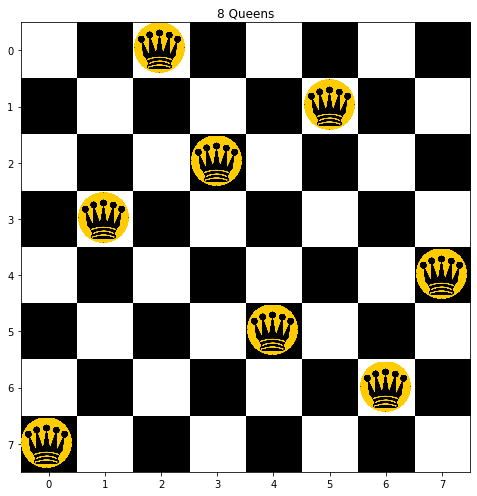

In [129]:
plot_NQueens(dfts)

In [130]:
def breadth_first_tree_searcha(problem):
    """
    [Figure 3.7]
    Search the shallowest nodes in the search tree first.
    Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Repeats infinitely in case of loops.
    """

    frontier = deque([Node(problem.initial)])  # FIFO queue

    while frontier:
        node = frontier.popleft()
        if problem.goal_test(node.state):
            return node
        frontier.extend(node.expand(problem))
    return None

In [131]:
%%timeit
breadth_first_tree_searcha(nqp)

34 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [132]:
bfts = breadth_first_tree_searcha(nqp).solution()

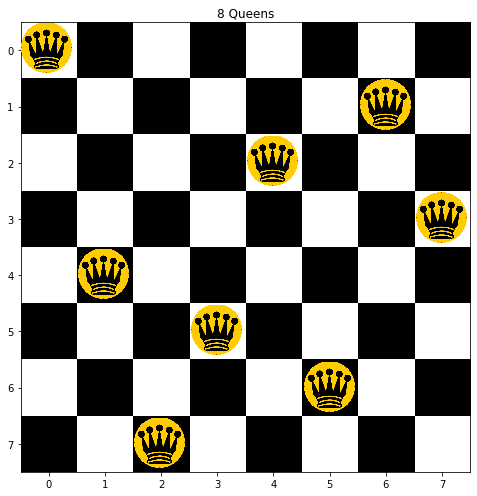

In [133]:
plot_NQueens(bfts)

In [134]:
%%timeit
uniform_cost_search(nqp)

337 ms ± 27.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [135]:
ucs = uniform_cost_search(nqp).solution()

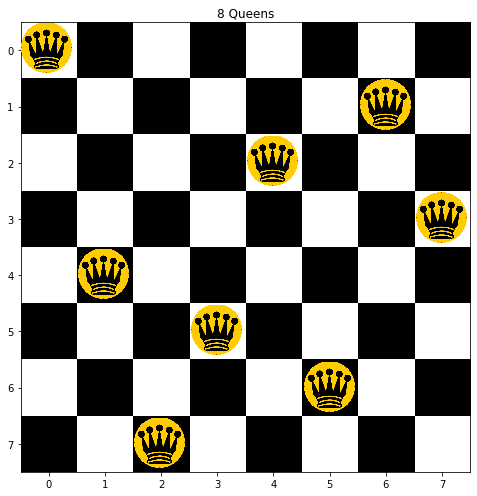

In [136]:
plot_NQueens(ucs)

## ¿De estos ejemplos, cual es el óptimo?

También podemos resolver este problema usando astar_search con una función heurística adecuada.
La mejor función heurística para este escenario será aquella que devuelva el número de conflictos en el estado actual.

In [137]:
psource(NQueensProblem.h)

In [138]:
%%timeit
astar_search(nqp)

3.29 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [139]:
astar = astar_search(nqp).solution()

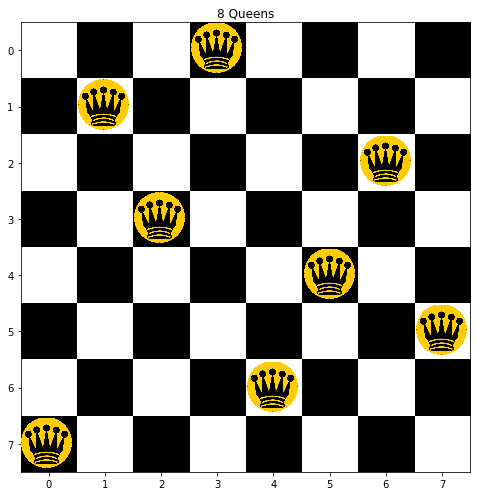

In [140]:
plot_NQueens(astar)

# Intentemos con los heurísticos...

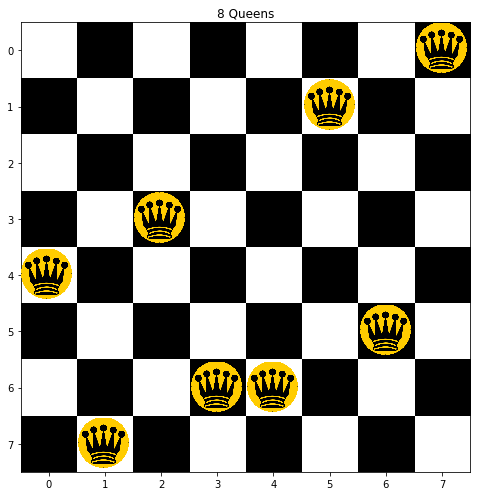

In [141]:
#Genetic Algorithm
plot_NQueens(solution)

# Proximamente....

<a id = 'CSP'></a>
# CONSTRAINT SATISFACTION PROBLEMS

[return](#general)

Los CSP son un tipo especial de problemas de búsqueda. Son cuestiones matemáticas definidas como un conjunto de objetos cuyo estado debe satisfacer una serie de restricciones o limitaciones. Los CSP representan las entidades de un problema como una colección homogénea de restricciones finitas sobre variables, que se resuelve mediante métodos de satisfacción de restricciones.

Los CSP son objeto de una intensa investigación tanto en inteligencia artificial como en investigación operativa, ya que la regularidad en su formulación proporciona una base común para analizar y resolver problemas de muchas familias aparentemente no relacionadas. Los CSP a menudo presentan una alta complejidad, lo que requiere una combinación de métodos de búsqueda combinatoria y heurística para resolverlos en un tiempo razonable. La Programación de Restricciones (CP) es el campo de investigación que se centra específicamente en abordar este tipo de problemas.

## CONTENIDO

* [Graph Coloring](#GC)
* N-Queens
* AC-3
* Backtracking Search
* Tree CSP Solver
* Graph Coloring Visualization
* N-Queens Visualization

En esta sección veremos algunas visualizaciones y resolveremos algunos de los problemas de CSP descritos en el libro. Vamos a importar todo desde el módulo csp para empezar.


In [142]:
from csp import *
from notebook import psource, plot_NQueens
%matplotlib inline

# Hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [143]:
psource(CSP)

<a id ='GC'></a>
## GRAPH COLORING

[return](#CSP)

Usamos el problema de coloración de gráficos como nuestro ejemplo en ejecución para demostrar los diferentes algoritmos en el módulo csp. La idea del problema del color del mapa es que los nodos adyacentes (aquellos conectados por bordes) no deben tener el mismo color en todo el gráfico. 

El gráfico se puede colorear con un número fijo de colores. Aquí cada nodo es una variable y los valores son los colores que se les pueden asignar. Dado que el dominio será el mismo para todos nuestros nodos, usamos un dictado personalizado definido por la clase UniversalDict. La clase UniversalDict toma un parámetro y lo devuelve como un valor para todas las claves del dict. Es muy similar a defaultdict en Python, excepto que no admite la asignación de elementos.


In [144]:
s = UniversalDict(['R','G','B'])
s[5]

['R', 'G', 'B']

Para nuestro CSP también necesitamos definir una función de restricción f (A, a, B, b). En esto, debemos asegurarnos de que los vecinos no tengan el mismo color. Esto se define en la función different_values_constraint del módulo.

In [145]:
psource(different_values_constraint)

La clase CSP toma vecinos en forma de Dict. El módulo especifica una función auxiliar simple llamada parse_neighbors que nos permite tomar entradas en forma de cadenas y devolver un Dict de un formulario que es compatible con la clase CSP.



In [146]:
%pdoc parse_neighbors

La función MapColoringCSP crea y devuelve un CSP con la función y los estados de restricción anteriores. Las variables son las claves del dictado de vecinos y la restricción es la especificada por la función different_values_constratint. Australia, EE. UU. Y Francia son tres CSP que se han creado utilizando MapColoringCSP. Australia corresponde a la ** Figura 6.1 ** del libro.



In [147]:
psource(MapColoringCSP)

In [148]:
australia_csp, usa_csp, france_csp

(<csp.CSP at 0x226dd5fa0c8>,
 <csp.CSP at 0x226dd6103c8>)

In [149]:
def check_valid(graph):
    for node,nexts in graph.items():
        assert(node not in nexts) # # no node linked to itself
        for next in nexts:
            assert(next in graph and node in graph[next]) # A linked to B implies B linked to A

def check_solution(graph, solution):
    if solution is not None:
        for node,nexts in graph.items():
            assert(node in solution)
            color = solution[node]
            for next in nexts:
                assert(next in solution and solution[next] != color)

def find_best_candidate(graph, guesses):
    if True: #optimised
        # Optimisations are to be put here. Ideas would be to take the node with the most uncolored neighboors or the one with the smallest possible number of colors or both
        candidates_with_add_info = [
            (
            -len({guesses[neigh] for neigh in graph[n] if neigh     in guesses}), # nb_forbidden_colors
            -len({neigh          for neigh in graph[n] if neigh not in guesses}), # minus nb_uncolored_neighbour
            n
            ) for n in graph if n not in guesses]
        candidates_with_add_info.sort()
        candidates = [n for _,_,n in candidates_with_add_info]
    else:
        candidates = [n for n in graph if n not in guesses]
        candidates.sort() # just to have some consistent performances
    if candidates:
        candidate = candidates[0]
        assert(candidate not in guesses)
        return candidate
    assert(set(graph.keys()) == set(guesses.keys()))
    return None

nb_calls = 0

def solve(graph, colors, guesses, depth):
    global nb_calls
    nb_calls += 1
    n = find_best_candidate(graph, guesses)
    if n is None:
        return guesses # Solution is found
    for c in colors - {guesses[neigh] for neigh in graph[n] if neigh in guesses}:
        assert(n not in guesses)
        assert(all((neigh not in guesses or guesses[neigh] != c) for neigh in graph[n]))
        guesses[n] = c
        indent = '  '*depth
        print("%sTrying to give color %s to %s" % (indent,c,n))
        if solve(graph, colors, guesses, depth+1):
            print("%sGave color %s to %s" % (indent,c,n))
            return guesses
        else:
            del guesses[n]
            print("%sCannot give color %s to %s" % (indent,c,n))
    return None


def solve_problem(graph, colors):
    check_valid(graph)
    solution = solve(graph, colors, dict(), 0)
    print(solution)
    check_solution(graph,solution)


WA  = 'western australia'
NT  = 'northwest territories'
SA  = 'southern australia'
Q   = 'queensland'
NSW = 'new south wales'
V   = 'victoria'
T   = 'tasmania'

australia = { T:   {V               },
              WA:  {NT, SA         },
              NT:  {WA, Q, SA       },
              SA:  {WA, NT, Q, NSW, V},
              Q:   {NT, SA, NSW   },
              NSW: {Q, SA, V         },
              V:   {SA, NSW, T     } }


AL = "Alabama"
AK = "Alaska"
AZ = "Arizona"
AR = "Arkansas"
CA = "California"
CO = "Colorado"
CT = "Connecticut"
DE = "Delaware"
FL = "Florida"
GA = "Georgia"
HI = "Hawaii"
ID = "Idaho"
IL = "Illinois"
IN = "Indiana"
IA = "Iowa"
KS = "Kansas"
KY = "Kentucky"
LA = "Louisiana"
ME = "Maine"
MD = "Maryland"
MA = "Massachusetts"
MI = "Michigan"
MN = "Minnesota"
MS = "Mississippi"
MO = "Missouri"
MT = "Montana"
NE = "Nebraska"
NV = "Nevada"
NH = "NewHampshire"
NJ = "NewJersey"
NM = "NewMexico"
NY = "NewYork"
NC = "NorthCarolina"
ND = "NorthDakota"
OH = "Ohio"
OK = "Oklahoma"
OR = "Oregon"
PA = "Pennsylvania"
RI = "RhodeIsland"
SC = "SouthCarolina"
SD = "SouthDakota"
TN = "Tennessee"
TX = "Texas"
UT = "Utah"
VT = "Vermont"
VA = "Virginia"
WA = "Washington"
WV = "WestVirginia"
WI = "Wisconsin"
WY = "Wyoming"

united_stated_of_america = {
    AL: {GA, FL, TN, MS},
    AK: {},
    AZ: {CA, NV, UT, CO, NM},
    AR: {MO, OK, TX, LA, TN, MS},
    CA: {OR, NV, AZ},
    CO: {WY, NE, KS, OK, NM, AZ, UT},
    CT: {},
    DE: {},
    FL: {AL, GA},
    GA: {SC, NC, TN, AL, FL},
    HI: {},
    ID: {WA, MT, OR, WY, UT, NV},
    IL: {WI, IA, MO, KY, IN, MI},
    IN: {MI, WI, IL, KY, OH},
    IA: {MN, SD, NE, MO, WI, IL},
    KS: {NE, CO, OK, MO},
    KY: {IN, IL, MO, TN, OH, WV, VA},
    LA: {AR, TX, MS},
    ME: {},
    MD: {},
    MA: {},
    MI: {IL, WI, IN, OH},
    MN: {ND, SD, IA, WI},
    MS: {TN, AR, LA, AL},
    MO: {IA, NE, KS, OK, AR, IL, KY, TN},
    MT: {ID, WY, SD, ND},
    NE: {SD, WY, CO, KS, MO, IA},
    NV: {OR, ID, UT, AZ, CA},
    NH: {},
    NJ: {},
    NM: {AZ, UT, CO, OK, TX},
    NY: {},
    NC: {GA, TN, SC, VA},
    ND: {MT, SD, MN},
    OH: {MI, IN, KY, WV},
    OK: {KS, CO, NM, TX, AR, MO},
    OR: {WA, ID, NV, CA},
    PA: {},
    RI: {},
    SC: {GA, NC},
    SD: {ND, MT, WY, NE, MN, IA},
    TN: {KY, MO, AR, MS, MO, AL, GA, NC},
    TX: {OK, NM, AR, LA},
    UT: {ID, NV, WY, CO, AZ, NM},
    VT: {},
    VA: {WV, KY, NC},
    WA: {OR, ID},
    WV: {OH, VA, KY},
    WI: {MN, IA, IL, MI, IN},
    WY: {MT, SD, NE, CO, UT, ID},
}

# Can't be bothered to complete the East part of the map - removing unused nodes (keeping them is also a good way to test your algorithm and see if still works)
united_stated_of_america = {n:neigh for n,neigh in united_stated_of_america.items() if neigh}

colors  = {'r', 'g', 'b', 'y'}

solve_problem(australia, colors)
solve_problem(united_stated_of_america, colors)
print(nb_calls)

Trying to give color r to southern australia
  Trying to give color b to new south wales
    Trying to give color y to queensland
      Trying to give color b to northwest territories
        Trying to give color y to victoria
          Trying to give color y to western australia
            Trying to give color r to tasmania
            Gave color r to tasmania
          Gave color y to western australia
        Gave color y to victoria
      Gave color b to northwest territories
    Gave color y to queensland
  Gave color b to new south wales
Gave color r to southern australia
{'southern australia': 'r', 'new south wales': 'b', 'queensland': 'y', 'northwest territories': 'b', 'victoria': 'y', 'western australia': 'y', 'tasmania': 'r'}
Trying to give color r to Missouri
  Trying to give color b to Kentucky
    Trying to give color y to Tennessee
      Trying to give color b to Arkansas
        Trying to give color y to Illinois
          Trying to give color b to Iowa
            Tryi

# Ejemplo de [Internet](https://github.com/Erfaniaa/map-coloring)

In [150]:
import cv2
import numpy as np
import sys
from matplotlib import pyplot as plt

try:
	MAP_IMAGE_PATH = "/images/usa_map.png"
except IndexError:
	print("Error: please specify an image.")
	exit(0)
ESCAPE_KEY_CHARACTER = 27
NO_COLOR = -1
NOT_MARKED = -1
BACKGROUND_MARK = -2
SLEEP_TIME_IN_MILLISECONDS = 100
MINIMUM_BORDER_WIDTH_RATIO = 0.15
IMPORTANT_COLOR_HIGH_THRESHOLD = 256 - 35
IMPORTANT_COLOR_LOW_THRESHOLD = 35
MINIMUM_REGION_AREA_RATIO = 0.0005
MAXIMUM_NEIGHBOR_PIXEL_COLOR_DIFFERENCE = 50
INF = 10 ** 30
MAXIMUM_NUMBER_OF_REGIONS = 1000
COLORING_COLORS = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255)]
DX = [-1, +1, 0, 0]
DY = [0, 0, -1, +1]
SHARPEN_KERNEL = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
MAXIMUM_IMAGE_WIDTH = 1000
MAXIMUM_IMAGE_HEIGHT = 1000

image = cv2.imread(MAP_IMAGE_PATH, cv2.IMREAD_COLOR)
height = len(image)
width = len(image[0])
if width > MAXIMUM_IMAGE_WIDTH or height > MAXIMUM_IMAGE_HEIGHT:
	print("Error: please specify an image with smaller dimensions.")
	exit(0)
total_area = width * height
mark = [[NOT_MARKED for i in range(width)] for j in range(height)]
nodes = []
regions = [[] for i in range(MAXIMUM_NUMBER_OF_REGIONS)]
regions_border = [[] for i in range(MAXIMUM_NUMBER_OF_REGIONS)]
nodes_color = [NO_COLOR for i in range(MAXIMUM_NUMBER_OF_REGIONS)]

class Node:
	def __init__(self, node_id, node_x, node_y):
		self.id = node_id
		self.x = node_x
		self.y = node_y
		self.adj = []
	def add_edge(self, node):
		self.adj.append(node.id)

def apply_threshold():
	for y in range(height):
		for x in range(width):
			b, g, r = image[y][x]
			r, g, b = int(r), int(g), int(b)
			if r + g + b < IMPORTANT_COLOR_LOW_THRESHOLD * 3:
				image[y][x] = (255, 255, 255)
				mark[y][x] = BACKGROUND_MARK
			if r + g + b > IMPORTANT_COLOR_HIGH_THRESHOLD * 3:
				image[y][x] = (255, 255, 255)
				mark[y][x] = BACKGROUND_MARK

def whiten_background():
	for y in range(height):
		for x in range(width):
			if mark[y][x] == NOT_MARKED or mark[y][x] == BACKGROUND_MARK:
				image[y][x] = (255, 255, 255)

def get_all_regions_pixels():
	for y in range(height):
		for x in range(width):
			region_mark = mark[y][x]
			regions[region_mark].append((x, y))
			if is_on_border(x, y):
				regions_border[region_mark].append((x, y))

def find_graph_nodes():
	for y in range(height):
		for x in range(width):
			if mark[y][x] == NOT_MARKED:
				color_area = get_region_area(x, y, NOT_MARKED, len(nodes))
				if color_area > MINIMUM_REGION_AREA_RATIO * total_area:
					nodes.append(Node(len(nodes), x, y))
				else:
					get_region_area(x, y, len(nodes), NOT_MARKED)
	get_all_regions_pixels()

def is_inside(x, y):
	if x < 0 or x >= width or y < 0 or y >= height:
		return False
	return True

def is_on_border(x, y):
	if mark[y][x] == BACKGROUND_MARK:
		return False
	for k in range(4):
		x2 = x + DX[k]
		y2 = y + DY[k]
		if is_inside(x2, y2) and mark[y2][x2] == BACKGROUND_MARK:
			return True
	return False

def same_pixel_colors(x1, y1, x2, y2):
	if not is_inside(x1, y1) or not is_inside(x2, y2):
		return False
	b1, g1, r1 = image[y1][x1]
	b2, g2, r2 = image[y2][x2]
	r1, g1, b1 = int(r1), int(g1), int(b1)
	r2, g2, b2 = int(r2), int(g2), int(b2)
	diff = abs(r1 - r2) + abs(g1 - g2) + abs(b1 - b2)
	return diff <= 3 * MAXIMUM_NEIGHBOR_PIXEL_COLOR_DIFFERENCE

def get_region_area(start_x, start_y, src_mark, dst_mark):
	if not is_inside(start_x, start_y) or mark[start_y][start_x] != src_mark:
		return 0
	color_area = 0
	queue = [(start_x, start_y)]
	mark[start_y][start_x] = dst_mark
	while queue:
		x, y = queue.pop(0)
		mark[y][x] = dst_mark
		color_area += 1
		for k in range(4):
			x2 = x + DX[k]
			y2 = y + DY[k]
			if is_inside(x2, y2) and mark[y2][x2] == src_mark and same_pixel_colors(x, y, x2, y2):
				mark[y2][x2] = dst_mark
				queue.append((x2, y2))
	return color_area

def are_adjacent(node1:Node, node2:Node):
	start_x, start_y = node1.x, node1.y
	end_x, end_y = node2.x, node2.y
	min_distance_sqr = INF
	for u in regions_border[mark[start_y][start_x]]:
		for v in regions_border[mark[end_y][end_x]]:
			tmp_distance_sqr = (u[0] - v[0]) * (u[0] - v[0]) + (u[1] - v[1]) * (u[1] - v[1])
			if tmp_distance_sqr < min_distance_sqr:
				min_distance_sqr = tmp_distance_sqr
				start_x, start_y = u[0], u[1] 
				end_x, end_y = v[0], v[1] 
	dx, dy = end_x - start_x, end_y - start_y
	if abs(dx) + abs(dy) <= 1:
		return True
	dx, dy = float(dx), float(dy)
	border_width_threshold = MINIMUM_BORDER_WIDTH_RATIO * (width * width + height * height)
	if min_distance_sqr >= border_width_threshold:
		return False
	total_steps = int(2 * ((width * width + height * height) ** 0.5))
	for i in range(total_steps):
		x = int(start_x + i * dx / total_steps + 0.5)
		y = int(start_y + i * dy / total_steps + 0.5)
		if mark[y][x] >= 0 and (x != start_x or y != start_y) and (x != end_x or y != end_y):
			return False
	return True

def add_graph_edges():
	for i in range(len(nodes)):
		for j in range(len(nodes)):
			if j > i and are_adjacent(nodes[i], nodes[j]):
				nodes[i].add_edge(nodes[j])
				nodes[j].add_edge(nodes[i])

def change_region_color(node:Node, pixel_color):
	region_idx = mark[node.y][node.x]
	for i in range(len(regions[region_idx])):
		x = regions[region_idx][i][0]
		y = regions[region_idx][i][1]
		image[y][x] = pixel_color

def colorize_map(node_index):
	if node_index == len(nodes):
		for i in range(len(nodes)):
			change_region_color(nodes[i], COLORING_COLORS[nodes_color[i]])
		cv2.imshow('Colorized Map', image)
		key = cv2.waitKey(SLEEP_TIME_IN_MILLISECONDS)
		if key == ESCAPE_KEY_CHARACTER:
			cv2.destroyAllWindows()
			exit()
		return
	for i in range(len(COLORING_COLORS)):
		is_color_valid = True
		for u in nodes[node_index].adj:
			if nodes_color[u] == i:
				is_color_valid = False
				break
		if is_color_valid:
			nodes_color[node_index] = i
			colorize_map(node_index + 1)
			nodes_color[node_index] = NO_COLOR

# cv2.imshow('Original Map', image)

print('Please wait for preprocessing...')

apply_threshold()
image = cv2.medianBlur(image, 3)
apply_threshold()
image = cv2.filter2D(image, -1, SHARPEN_KERNEL)
apply_threshold()

find_graph_nodes()
add_graph_edges()

whiten_background()

print('Preprocessing finished.')

# cv2.imshow('Modified Map', image)

colorize_map(0)

cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: object of type 'NoneType' has no len()

---
<a id = 'IG'></a>
# Intelligent Games


## Contenido

* Game Representation
* Game Examples
    * Tic-Tac-Toe
    * Figure 5.2 Game
    * Backgammon
    
* Min-Max
* Alpha-Beta
* Players
* Let's Play Some Games!

[return](#general)

In [151]:
from games import *
from notebook import psource, pseudocode

## REPRESENTACIÓN DEL JUEGO

Para representar juegos usamos la clase `Game`, que podemos subclasificar y anular sus funciones para representar nuestros propios juegos. Una herramienta auxiliar es la tupla con nombre `GameState`, que en algunos casos puede resultar útil, especialmente cuando nuestro juego necesita que recordemos un tablero (como el ajedrez).

<a id = 'BAJ'></a>
## Introducción - Búsqueda de árbol en juegos

[return](#IG)

Comenzamos definiendo la clase abstracta Game, para juegos de n jugadores que toman turnos. Confiamos en, pero aún no definimos, el concepto de estado del juego; veremos más adelante cómo los juegos individuales definen estados. Por ahora, todo lo que necesitamos es que un estado tenga un atributo state.to_move, que da el nombre del jugador al que le toca el turno. ("Nombre" será algo así como 'X' u 'O' para Gato {tic-tac-toe}).

También definimos play_game, que toma un juego y un diccionario de pares de {player_name: strategy_function}, y juega el juego, en cada turno verificando state.to_move para ver de quién es el turno, y luego obteniendo la función de estrategia para ese jugador y aplicándolo al juego y al estado para conseguir un movimiento.

In [152]:
from collections import namedtuple, Counter, defaultdict
import random
import math
import functools 
cache = functools.lru_cache(10**6)
#https://docs.python.org/3/library/functools.html
"""En general, la caché de LRU solo debe usarse cuando desee reutilizar 
valores calculados previamente. En consecuencia, no tiene sentido 
almacenar en caché funciones con efectos secundarios, funciones 
que necesitan crear objetos mutables distintos en cada llamada, 
o funciones impuras como time () o random ()."""

'En general, la caché de LRU solo debe usarse cuando desee reutilizar \nvalores calculados previamente. En consecuencia, no tiene sentido \nalmacenar en caché funciones con efectos secundarios, funciones \nque necesitan crear objetos mutables distintos en cada llamada, \no funciones impuras como time () o random ().'

In [153]:
class Game:
    """A game is similar to a problem, but it has a terminal test instead of 
    a goal test, and a utility for each terminal state. To create a game, 
    subclass this class and implement `actions`, `result`, `is_terminal`, 
    and `utility`. You will also need to set the .initial attribute to the 
    initial state; this can be done in the constructor."""

    def actions(self, state):
        """Return a collection of the allowable moves from this state."""
        raise NotImplementedError

    def result(self, state, move):
        """Return the state that results from making a move from a state."""
        raise NotImplementedError

    def is_terminal(self, state):
        """Return True if this is a final state for the game."""
        return not self.actions(state)
    
    def utility(self, state, player):
        """Return the value of this final state to player."""
        raise NotImplementedError
        

def play_game(game, strategies: dict, verbose=False):
    """Play a turn-taking game. `strategies` is a {player_name: function} dict,
    where function(state, game) is used to get the player's move."""
    state = game.initial
    while not game.is_terminal(state):
        player = state.to_move
        move = strategies[player](game, state)
        state = game.result(state, move)
        if verbose: 
            print('Player', player, 'move:', move)
            print(state)
    return state

### Algoritmos de búsqueda de juegos basados ​​en Minimax

Definiremos varios algoritmos de búsqueda de juegos. Cada uno toma dos entradas, el juego que estamos jugando y el estado actual del juego, y devuelve un par `(valor, movimiento)`, donde `valor` es la utilidad que el algoritmo calcula para el jugador al que le toca moverse. y "move" es el movimiento en sí.

Primero definimos `minimax_search`, que busca exhaustivamente en el árbol del juego para encontrar un movimiento óptimo (asumiendo que ambos jugadores juegan de manera óptima), y` alphabeta_search`, que hace el mismo cálculo, pero poda partes del árbol que posiblemente no podrían tener un efecto en el movimiento óptimo.

In [154]:
def minimax_search(game, state):
    """Search game tree to determine best move; return (value, move) pair."""

    player = state.to_move

    def max_value(state):
        if game.is_terminal(state):
            return game.utility(state, player), None
        v, move = -infinity, None
        for a in game.actions(state):
            v2, _ = min_value(game.result(state, a))
            if v2 > v:
                v, move = v2, a
        return v, move

    def min_value(state):
        if game.is_terminal(state):
            return game.utility(state, player), None
        v, move = +infinity, None
        for a in game.actions(state):
            v2, _ = max_value(game.result(state, a))
            if v2 < v:
                v, move = v2, a
        return v, move

    return max_value(state)

infinity = math.inf

def alphabeta_search(game, state):
    """Search game to determine best action; use alpha-beta pruning.
    As in [Figure 5.7], this version searches all the way to the leaves."""

    player = state.to_move

    def max_value(state, alpha, beta):
        if game.is_terminal(state):
            return game.utility(state, player), None
        v, move = -infinity, None
        for a in game.actions(state):
            v2, _ = min_value(game.result(state, a), alpha, beta)
            if v2 > v:
                v, move = v2, a
                alpha = max(alpha, v)
            if v >= beta:
                return v, move
        return v, move

    def min_value(state, alpha, beta):
        if game.is_terminal(state):
            return game.utility(state, player), None
        v, move = +infinity, None
        for a in game.actions(state):
            v2, _ = max_value(game.result(state, a), alpha, beta)
            if v2 < v:
                v, move = v2, a
                beta = min(beta, v)
            if v <= alpha:
                return v, move
        return v, move

    return max_value(state, -infinity, +infinity)

### Un juego simple: Tic-Tac-Toe

Tenemos la noción de un juego abstracto, tenemos algunas funciones de búsqueda; ahora es el momento de definir un juego real; uno simple, tic-tac-toe. Los movimientos son pares `(x, y)` que denotan cuadrados, donde `(0, 0)` es la parte superior izquierda y `(2, 2)` es la parte inferior derecha (en un tablero de tamaño `altura = ancho = 3 `).

<img src="images/fig_5_2.png" width="75%">

In [155]:
class TicTacToe(Game):
    """Play TicTacToe on an `height` by `width` board, needing `k` in a row to win.
    'X' plays first against 'O'."""

    def __init__(self, height=3, width=3, k=3):
        self.k = k # k in a row
        self.squares = {(x, y) for x in range(width) for y in range(height)}
        self.initial = Board(height=height, width=width, to_move='X', utility=0)

    def actions(self, board):
        """Legal moves are any square not yet taken."""
        return self.squares - set(board)

    def result(self, board, square):
        """Place a marker for current player on square."""
        player = board.to_move
        board = board.new({square: player}, to_move=('O' if player == 'X' else 'X'))
        win = k_in_row(board, player, square, self.k)
        board.utility = (0 if not win else +1 if player == 'X' else -1)
        return board

    def utility(self, board, player):
        """Return the value to player; 1 for win, -1 for loss, 0 otherwise."""
        return board.utility if player == 'X' else -board.utility

    def is_terminal(self, board):
        """A board is a terminal state if it is won or there are no empty squares."""
        return board.utility != 0 or len(self.squares) == len(board)

    def display(self, board): print(board)     


def k_in_row(board, player, square, k):
    """True if player has k pieces in a line through square."""
    def in_row(x, y, dx, dy): return 0 if board[x, y] != player else 1 + in_row(x + dx, y + dy, dx, dy)
    return any(in_row(*square, dx, dy) + in_row(*square, -dx, -dy) - 1 >= k
               for (dx, dy) in ((0, 1), (1, 0), (1, 1), (1, -1)))

Los estados en tic-tac-toe (y otros juegos) se representarán como un tablero, que es una subclase de defaultdict que, en general, constará de pares {(x, y): contenido}, por ejemplo {(0, 0) : 'X', (1, 1): 'O'} podría ser el estado del tablero después de dos movimientos. Además del contenido de los cuadrados, un tablero también tiene algunos atributos:

* .to_move para nombrar al jugador cuyo movimiento es;
* .width y .height para dar el tamaño del tablero (ambos 3 en tic-tac-toe, pero otros números en juegos relacionados);
* posiblemente otros atributos, según lo especificado por palabras clave.

Por defecto, la clase Board tiene un método __missing__, que devuelve vacío para los cuadrados que no han sido asignados pero que están dentro de los límites de ancho × alto, o desactivados de otra manera. La clase tiene un método __hash__, por lo que las instancias se pueden almacenar en tablas hash.

In [156]:
class Board(defaultdict):
    """A board has the player to move, a cached utility value, 
    and a dict of {(x, y): player} entries, where player is 'X' or 'O'."""
    empty = '.'
    off = '#'
    
    def __init__(self, width=8, height=8, to_move=None, **kwds):
        self.__dict__.update(width=width, height=height, to_move=to_move, **kwds)
        
    def new(self, changes: dict, **kwds) -> 'Board':
        "Given a dict of {(x, y): contents} changes, return a new Board with the changes."
        board = Board(width=self.width, height=self.height, **kwds)
        board.update(self)
        board.update(changes)
        return board

    def __missing__(self, loc):
        x, y = loc
        if 0 <= x < self.width and 0 <= y < self.height:
            return self.empty
        else:
            return self.off
            
    def __hash__(self): 
        return hash(tuple(sorted(self.items()))) + hash(self.to_move)
    
    def __repr__(self):
        def row(y): return ' '.join(self[x, y] for x in range(self.width))
        return '\n'.join(map(row, range(self.height))) +  '\n'

### Players

Necesitamos una interfaz para los jugadores. Representaré a un jugador como un "invocable" al que se le pasarán dos argumentos: "(juego, estado)" y devolverá un "movimiento".
La función `player` crea un reproductor a partir de un algoritmo de búsqueda, pero puedes crear tus propios reproductores como funciones, como se hace con` random_player` a continuación:

In [157]:
def random_player(game, state): return random.choice(list(game.actions(state)))

def player(search_algorithm):
    """A game player who uses the specified search algorithm"""
    return lambda game, state: search_algorithm(game, state)[1]

### Jugando un juego

Estamos listos para jugar un juego. Estableceré una partida entre un `jugador_aleatorio` (que elige aleatoriamente entre los movimientos legales) y un` jugador (búsqueda_alfabeta) `(que hace el movimiento alfa-beta óptimo; práctico para tic-tac-toe, pero no para juegos grandes). El `player (alphabeta_search)` nunca perderá, pero si `random_player` tiene suerte, habrá un empate.



In [158]:
play_game(TicTacToe(), dict(X=random_player, O=player(alphabeta_search)), verbose=True).utility

Player X move: (2, 2)
. . .
. . .
. . X

Player O move: (1, 1)
. . .
. O .
. . X

Player X move: (1, 0)
. X .
. O .
. . X

Player O move: (0, 1)
. X .
O O .
. . X

Player X move: (0, 0)
X X .
O O .
. . X

Player O move: (2, 0)
X X O
O O .
. . X

Player X move: (2, 1)
X X O
O O X
. . X

Player O move: (0, 2)
X X O
O O X
O . X



-1

# Para regresar al principio de la notebook -> [return](#general)